<h2><font color='maroon'><u><center>HOUSING PROJECT : Sale Price Prediction

In [488]:
#Importing Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(font_scale=2)

import os
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.core.pylabtools import figsize

plt.rcParams["font.size"]=24
Syntax: pd.set_option('display.max_columns', None)
    
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")






#a Small code to save all necessary plots as images to be used in ppt 

root_dir = "."
project_id = "housing_project"
image_path = os.path.join(root_dir,"images",project_id)

def save_fig(fig_id, tight_layout=True, extension="png", dim=300):
    os.makedirs(image_path,exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+extension)
    print("saving ...."+fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_id, format=extension, dpi=dim)
     




Let Us read our train and test Data.

In [312]:
# Read in train and test data into a dataframe 

train = pd.read_csv(r"C:\Users\Glenn\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\train.csv",header=0)
test = pd.read_csv(r"C:\Users\Glenn\Downloads\Project-Housing--2---1---1-\Project-Housing_splitted\test.csv",header=0)

#checking the size of the train and test data

print(train.shape)
print(test.shape)

(1168, 76)
(292, 80)


In [314]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

In [14]:
# display the content of the train data
train.sample(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
232   799          60       RL        104.0    13518   Pave   NaN      Reg   
660  1024         120       RL         43.0     3182   Pave   NaN      Reg   
891   595          20       RL         88.0     7990   Pave   NaN      IR1   
580   856          20       RL          NaN     6897   Pave   NaN      IR1   
645  1245          70       RL          NaN    11435   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
232         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
660         Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
891         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
580         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
645         HLS    AllPub    Corner       Mod      Crawfor       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
232       Norm     1Fam     2Story            9            5       2008   
660       Norm   TwnhsE     1Story            7            5       2005   
891       Norm     1Fam     1Story            5            6       1975   
580       Norm     1Fam     1Story            5            8       1962   
645       Norm     1Fam     2Story            8            7       1929   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
232          2009       Hip  CompShg     VinylSd     VinylSd      Stone   
660          2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
891          1975       Hip  CompShg     HdBoard     HdBoard       None   
580          2010     Gable  CompShg     HdBoard     HdBoard       None   
645          1950     Gable  CompShg     BrkFace      Stucco       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
232       860.0        Ex        TA      PConc       Ex       TA           No   
660        14.0        Gd        TA      PConc       Gd       Gd           No   
891         0.0        TA        TA     CBlock       Gd       TA           No   
580         0.0        TA        Gd     CBlock       TA       TA           No   
645         0.0        TA        TA      PConc       Gd       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
232          Unf           0          Unf           0       1926         1926   
660          GLQ          16          Unf           0       1330         1346   
891          Unf           0          Unf           0        924          924   
580          ALQ         659          Unf           0        381         1040   
645          Unf           0          Unf           0        792          792   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
232    GasA        Ex          Y      SBrkr      1966      1174             0   
660    GasA        Ex          Y      SBrkr      1504         0             0   
891    GasA        TA          Y      SBrkr       924         0             0   
580    GasA        Ex          Y      SBrkr      1040         0             0   
645    GasA        Fa          Y      SBrkr       792       725             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
232       3140             0             0         3         1             4   
660       1504             0             0         2         0             2   
891        924             0             0         1         0             3   
580       1040             1             0         1         1             3   
645       1517             0             0         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
232             1          Ex            11        Typ           2   
660             1          Gd             7        Typ           1   
891             1          TA             5  

1. From the above displays, we can see that there is one less column in the test data which is the sale price i.e the target.
2. There are alot of missing values.
3. In both data there are fairly large number of categorical and numerical values.

In [175]:
#give the details information of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

1. All columns should be having 1168 records, but it is not so. there are quite a few missing values.
2. there is a mixture of numerical and categorical values.

In [6]:
#give the details information of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [317]:
#Creating a function to find the number of missing values and a percentage for better understanding
def null_vals(df):
    mis_val_sum = df.isnull().sum()
    percent_mis = mis_val_sum * 100 / len(df)
    table = pd.concat([mis_val_sum,percent_mis], axis=1)
    table = table.rename(columns={0:"missing values", 1:"percent of missing value"})
    table = table[table["missing values"]!=0].sort_values("percent of missing value", ascending =False).round(1)
    print("The dataset has", df.shape[1],"columns and ", table.shape[0],"have missing values \n\n")
    return table


#Calling the above User-defined function to find the missing values in both test and train data
#train_nul = null_vals(train)
test_nul = null_vals(test)

The dataset has 80 columns and  19 have missing values 




In [23]:
#Lets check the table we made for train data
train_nul

missing values  percent of missing value
PoolQC                  1161                      99.4
MiscFeature             1124                      96.2
Alley                   1091                      93.4
Fence                    931                      79.7
FireplaceQu              551                      47.2
LotFrontage              214                      18.3
GarageType                64                       5.5
GarageYrBlt               64                       5.5
GarageFinish              64                       5.5
GarageQual                64                       5.5
GarageCond                64                       5.5
BsmtExposure              31                       2.7
BsmtFinType2              31                       2.7
BsmtCond                  30                       2.6
BsmtFinType1              30                       2.6
BsmtQual                  30                       2.6
MasVnrArea                 7                       0.6
MasVnrType                 7                       0.6

In [318]:
#Lets check the table we made for test data
test_nul

missing values  percent of missing value
PoolQC                   292                     100.0
MiscFeature              282                      96.6
Alley                    278                      95.2
Fence                    248                      84.9
FireplaceQu              139                      47.6
LotFrontage               45                      15.4
GarageType                17                       5.8
GarageYrBlt               17                       5.8
GarageFinish              17                       5.8
GarageQual                17                       5.8
GarageCond                17                       5.8
BsmtExposure               7                       2.4
BsmtFinType1               7                       2.4
BsmtFinType2               7                       2.4
BsmtCond                   7                       2.4
BsmtQual                   7                       2.4
MasVnrArea                 1                       0.3
MasVnrType                 1                       0.3
Electrical                 1                       0.3

1. Since there have 80 features we have alot to work with when it comes to number of features. but more the number of features will add on to processing time and complications. so if features arent complete, we can think of removing some of the features.
2. On analysing both the train and test data, we can roughly drop all columns with missing value above 45%. Since it is evidently clear in both the train and test data, that the missing data percentage sharply drops after the 47% mark.

Let us noe drop these columns in both test and train dataset. But before we do this, lets create a copy.


In [319]:
test1=test
TRAIN1=train

In [320]:
#listing all the columns from the train and test set whose missing percentage is more than 45%

mtrain = list(table_train[table_train["percent of missing value"]>40].index)
mtest = list(table_test[table_test["percent of missing value"]>40].index)

print(r' The Columns with percentage of missing values >40 in train datset are ',mtrain)
print(r' The Columns with percentage of missing values >40 in test dataset are ',mtest)

 The Columns with percentage of missing values >40 in train datset are  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
 The Columns with percentage of missing values >40 in test dataset are  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


In [321]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1,inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1,inplace=True)

In [322]:
# Checking the shape and size of the train and test dataframe
print(train.shape)
print(test.shape)

(1168, 76)
(292, 75)


# Step:2-Exploratory Data Analysis

1. Now Lets Understand our datasets, the columns relationships with eachother and the target variable.
2. here ofcourse, we will be studying only the train datset.

First Let us address the elephant in the room and look at the missing data.

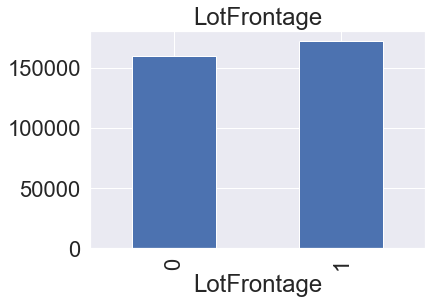

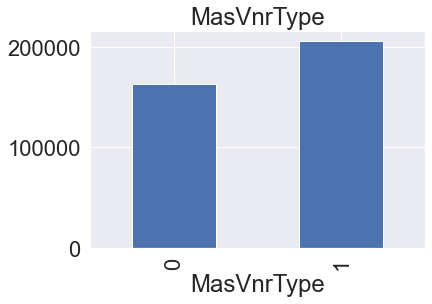

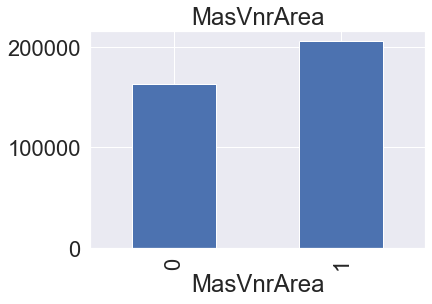

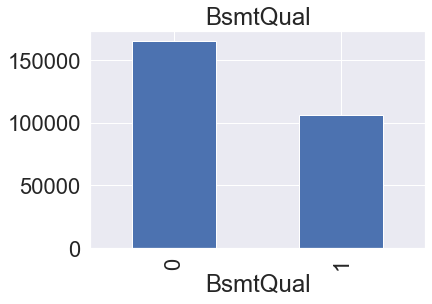

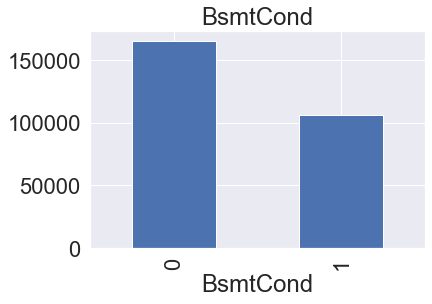

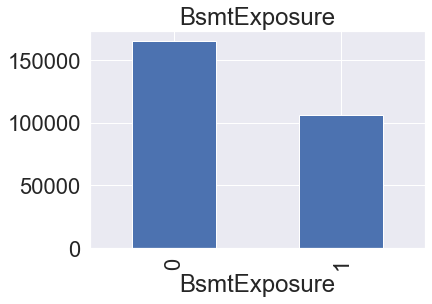

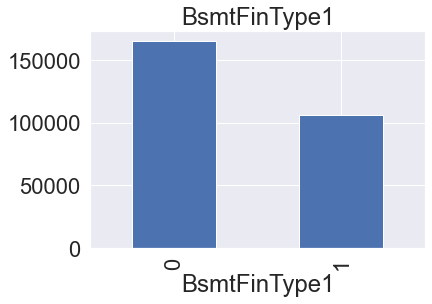

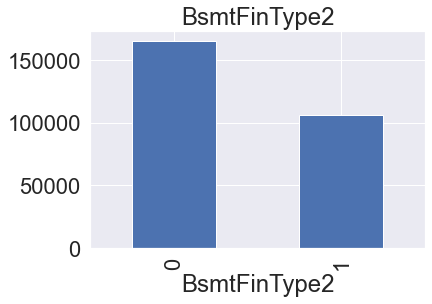

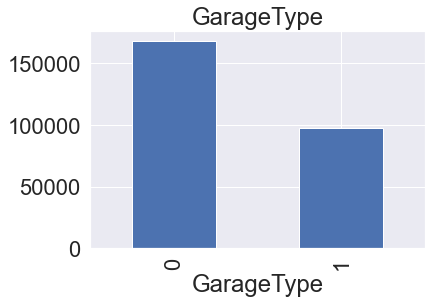

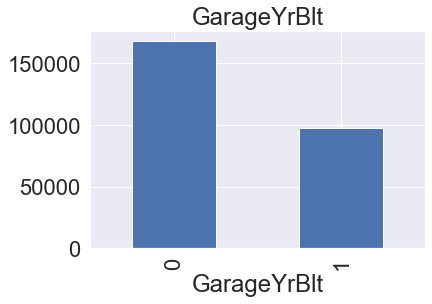

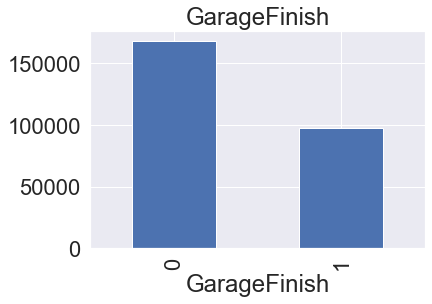

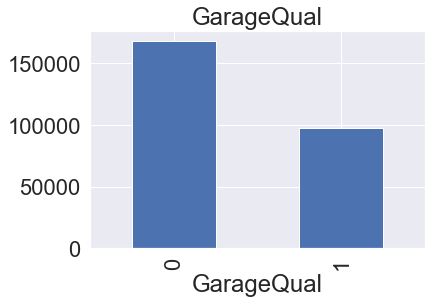

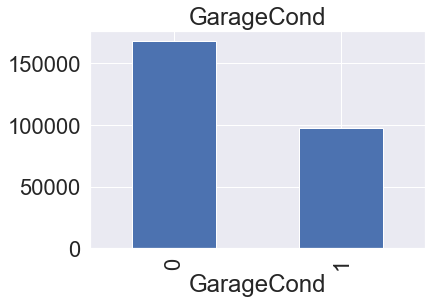

In [33]:
# To understand how to treat missing data better, let us visually analyse each column of the train data
#Using 1 as indicator if we find a null value

colna = [col for col in train.columns if train[col].isnull().sum()>1]

for cols in colna:
    
    
    
    
    train[cols] = np.where(train[cols].isnull(),1,0)
    
    train.groupby(cols)['SalePrice'].median().plot.bar()
    plt.title(cols)
    plt.show()

In [34]:
#Lets make a note of all Numerical and Categorical data columns

Categorical_features = [x for x in train.columns if train[x].dtype == 'object']
print("Number of categorical values: ",len(Categorical_features))
train[Categorical_features].head()

Number of categorical values:  28


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation Heating HeatingQC  \
0     Plywood     Plywood        TA        TA     CBlock    GasA        TA   
1     Wd Sdng     Wd Sdng        Gd        Gd      PConc    GasA        Ex   
2     MetalSd     MetalSd        Gd        TA      PConc    GasA        Ex   
3     Plywood     Plywood        TA        TA     CBlock    GasA        Ex   
4     CemntBd     CmentBd        Gd        TA     CBlock    GasA        Gd   

  CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0          Y      SBrkr          TA        Typ          Y       WD   
1          Y      SBrkr          Gd        Typ          Y       WD   
2          Y      SBrkr          TA        Typ          Y       WD   
3          Y      SBrkr          TA        Typ          Y      COD   
4          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal

In [36]:
#Similarly now for numerical data

num_features = [x for x in train.columns if train[x].dtype != 'object']
print("Number of numerical values: ",len(num_features))
train[num_features].head()

Number of numerical values:  48


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120            1     4928            6            5       1976   
1  889          20            0    15865            8            6       1970   
2  793          60            0     9920            7            5       1996   
3  110          20            0    11751            6            6       1977   
4  422          20            1    16635            6            7       1977   

   YearRemodAdd  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  \
0          1976           0           0         0         0             0   
1          1970           0           0         0         0             0   
2          1997           0           0         0         0             0   
3          1977           0           0         0         0             0   
4          2000           0           0         0         0             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             0         120             0           0        958         1078   
1             0         351             0         823       1043         2217   
2             0         862             0           0        255         1117   
3             0         705             0           0       1139         1844   
4             0        1246             0           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
0           0            0             0           2         440           0   
1           0            0             0           2         621           0   
2           0            0             0           2         455           0   
3           0            0             0           2         546           0   
4           0            0             0           2         529           0   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           0           0          205              0          0            0   
1           0          81          207              0          0          224   
2           0         180          130              0          0            0   
3           0           0          122              0          0            0   
4           0         240            0              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2007     128000  
1         0        0      10    2007     268000  
2         0        0       6    2007     269790  
3         0        0       1    2010     190000  
4         0        0       6    2009     215000

1. AS of now, nothinf seems to be wrong with the categorical data columns. All predictions are true
2.  But in case of Numerical data, the predictions are not entirely accurate, there are some features that have been detected as a numerical value because its got integer value. this needs to be corrects. 

Anothing thing that impacts gravely, is whether we have to convert the year based columns to Datetime type. or convert it to categorical or even remove it. for this.. let us study the relevance.

Text(0.5, 1.0, 'House Price vs YearSold')

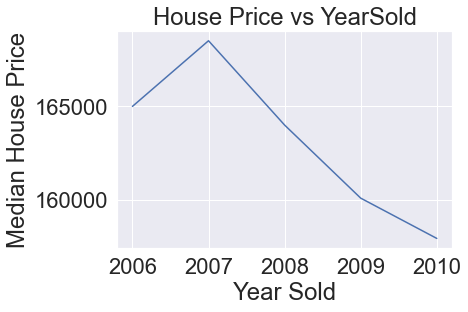

In [41]:
#checking the columns which contains year information to predict their impacts

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0.5, 1.0, 'House Price vs YearBuilt')

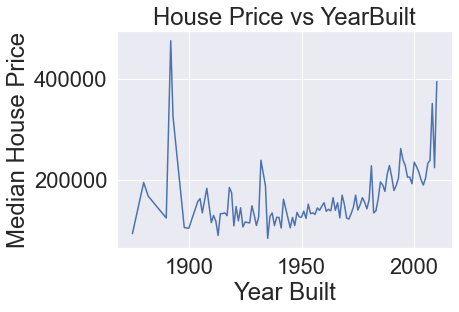

In [39]:

train.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title('House Price vs YearBuilt')

Text(0.5, 1.0, 'House Price vs YearRemodAdd')

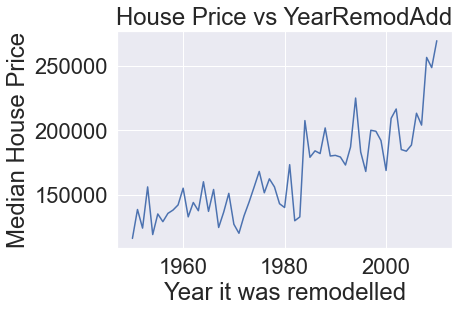

In [40]:

train.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel('Year it was remodelled')
plt.ylabel('Median House Price')
plt.title('House Price vs YearRemodAdd')

Text(0.5, 1.0, 'House Price vs GarageYrBlt')

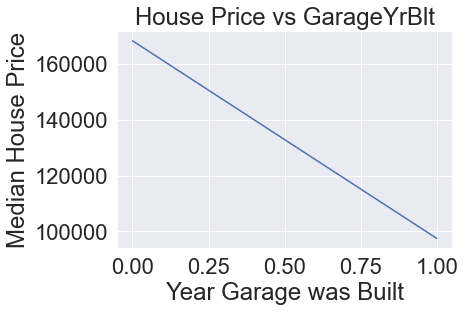

In [42]:
train.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel('Year Garage was Built')
plt.ylabel('Median House Price')
plt.title('House Price vs GarageYrBlt')

1. In all the above cases we can see that there is a relavance for the yr based columns on the sale price. 


We will go for the discrete data present in the dataframe. We will analyse the data and based on the analysis we will try to predict the best attributes which contribute most to predict our SalesPrice.

In [63]:
discrete_features = [features for features in num_features if len(train[features].unique())<25 and features not in year_features+['Id']]
print("Discrete Varibales Count: {}".format(len(discrete_features)))

Discrete Varibales Count: 29


In [64]:
# Visualizing the data of the  discrete set
train[discrete_features].head()

MSSubClass  LotFrontage  OverallQual  OverallCond  MasVnrType  MasVnrArea  \
0         120            1            6            5           0           0   
1          20            0            8            6           0           0   
2          60            0            7            5           0           0   
3          20            0            6            6           0           0   
4          20            1            6            7           0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  LowQualFinSF  \
0         0         0             0             0             0             0   
1         0         0             0             0             0             0   
2         0         0             0             0             0             0   
3         0         0             0             0             0             0   
4         0         0             0             0             0             0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

   TotRmsAbvGrd  Fireplaces  GarageType  GarageFinish  GarageCars  GarageQual  \
0             5           1           0             0           2           0   
1             8           1           0             0           2           0   
2             8           1           0             0           2           0   
3             7           1           0             0           2           0   
4             8           1           0             0           2           0   

   GarageCond  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0          0         0        0       2  
1           0          0         0        0      10  
2           0          0         0        0       6  
3           0          0         0        0       1  
4           0          0         0        0       6

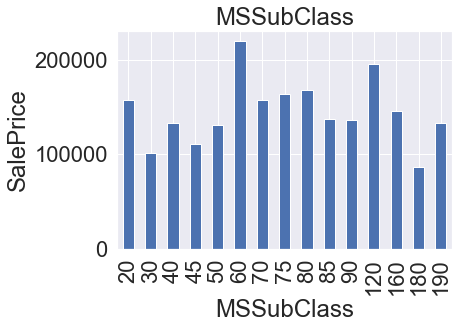

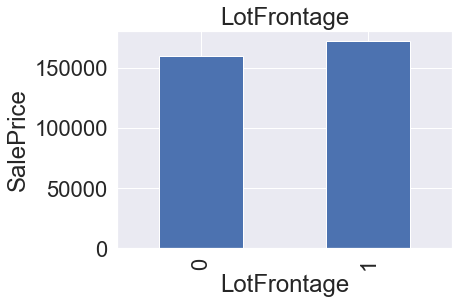

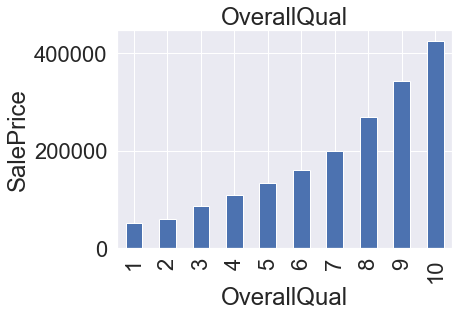

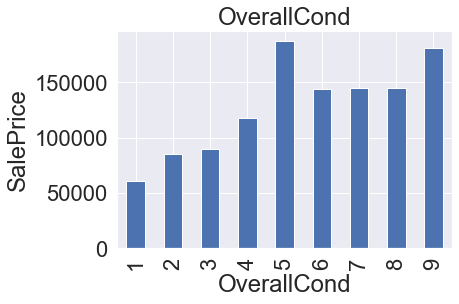

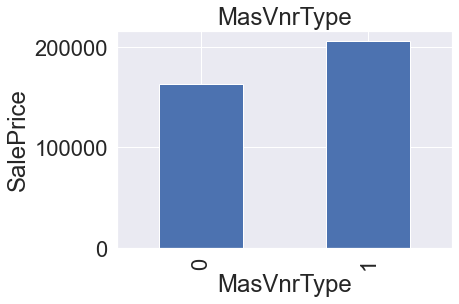

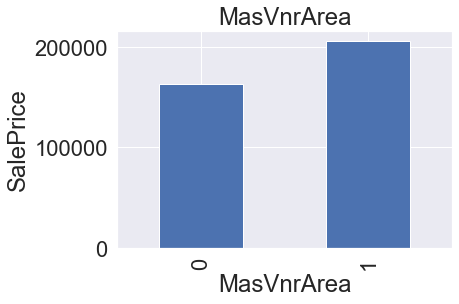

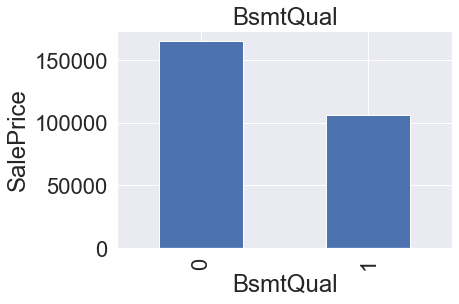

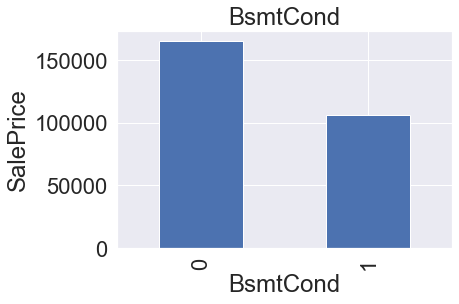

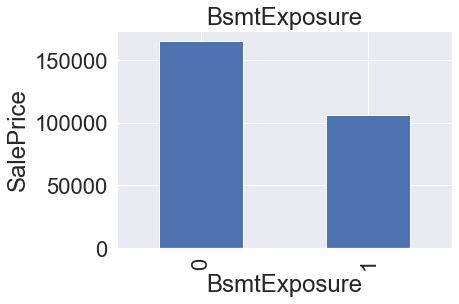

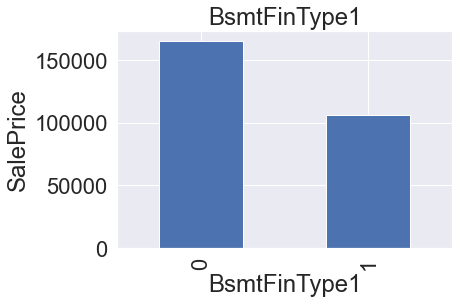

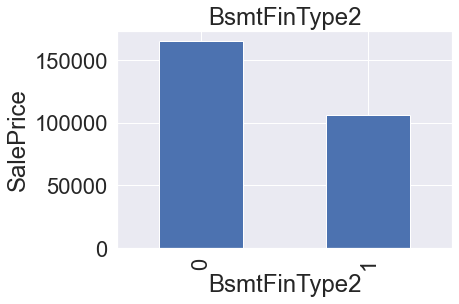

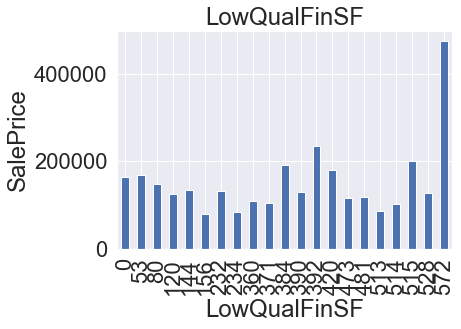

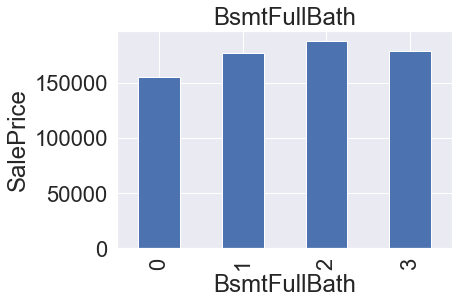

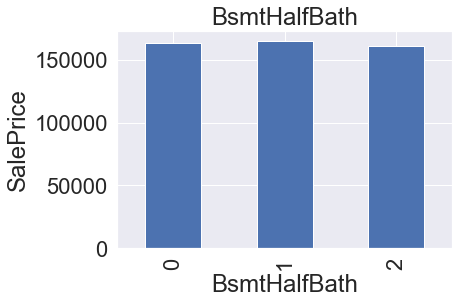

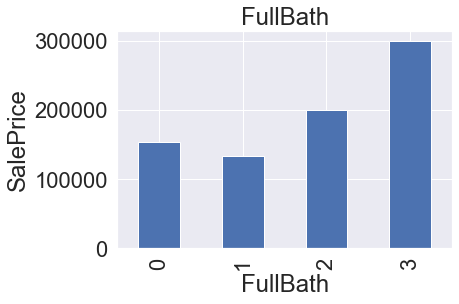

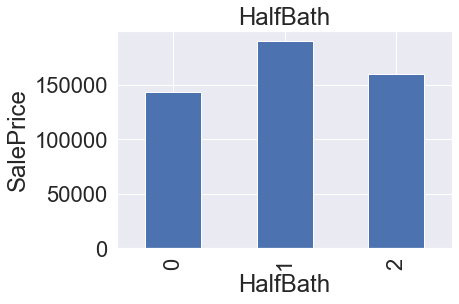

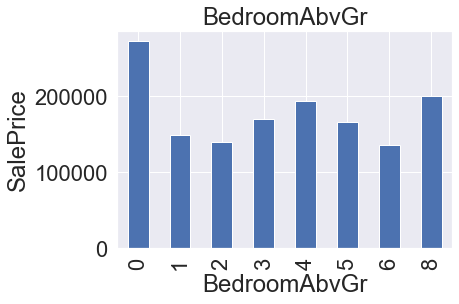

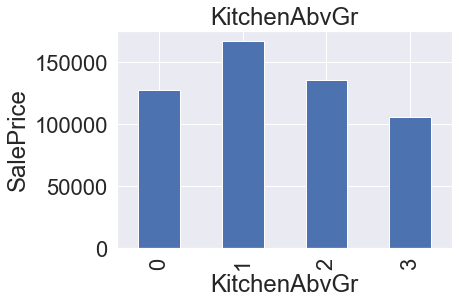

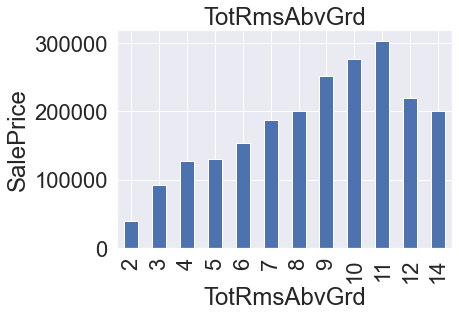

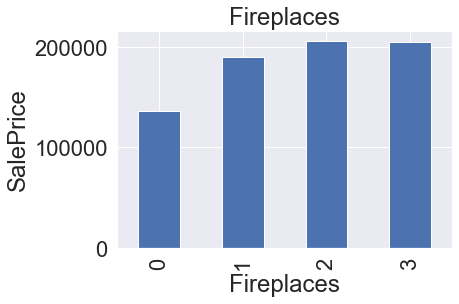

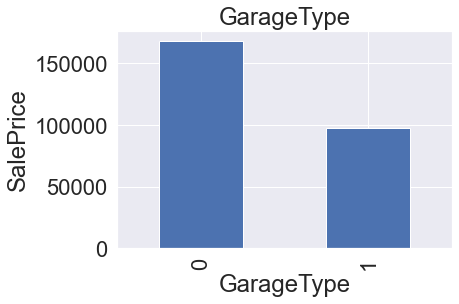

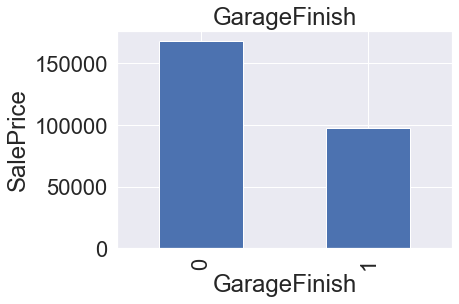

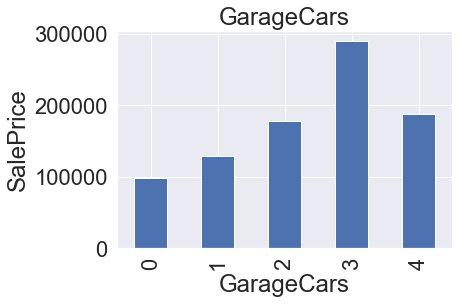

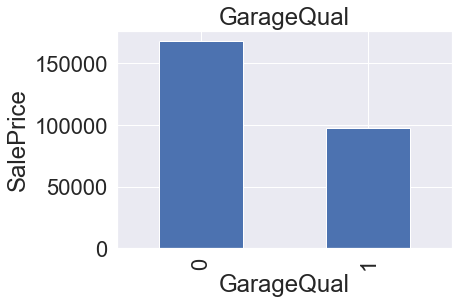

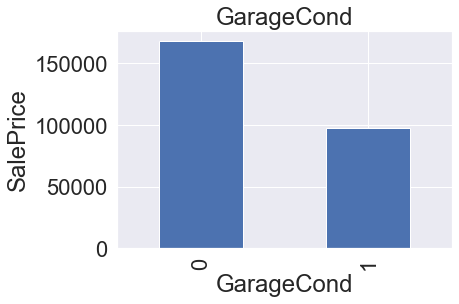

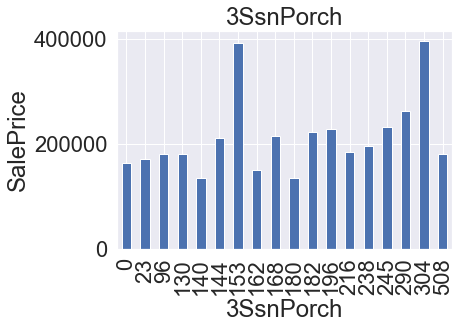

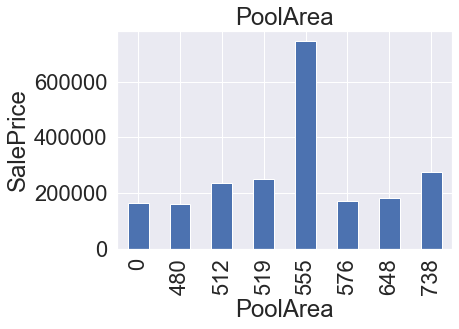

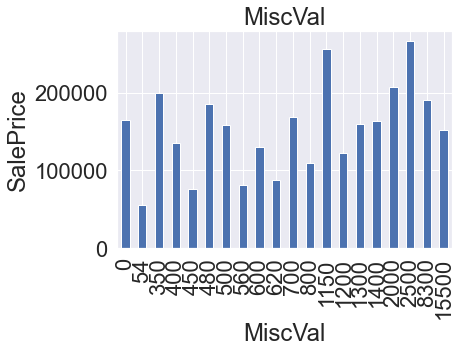

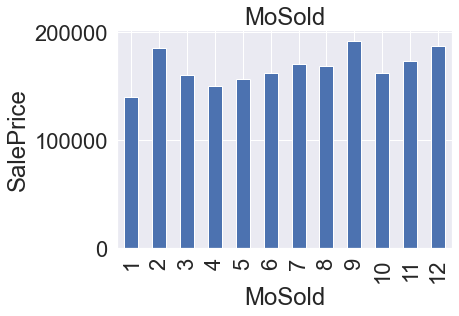

In [65]:
# Plotting the bar graph of all the discret columns present in our dataframe.

for features in discrete_features:
    
    train.groupby(features)['SalePrice'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()  

In [67]:
# Now we will look for the continous data in the dataframe and display the continous data
continous_feature = [features for features in num_features if features not in discrete_features+year_features+['Id']]
print("Continous feature count {}".format(len(continous_feature)))

Continous feature count 14


In [71]:
def num_plot(df):
    for i in continous_feature:
        plt.figure(figsize=(20,5))
        plt.subplot(1,3,1)
        sns.histplot(x=i,data=df,kde=True)
        plt.subplot(1,3,2)
        sns.regplot(x=i,y=train['SalePrice'],data=df)
        plt.subplot(1,3,3)
        sns.boxplot(y=i,data=df)
        plt.show()

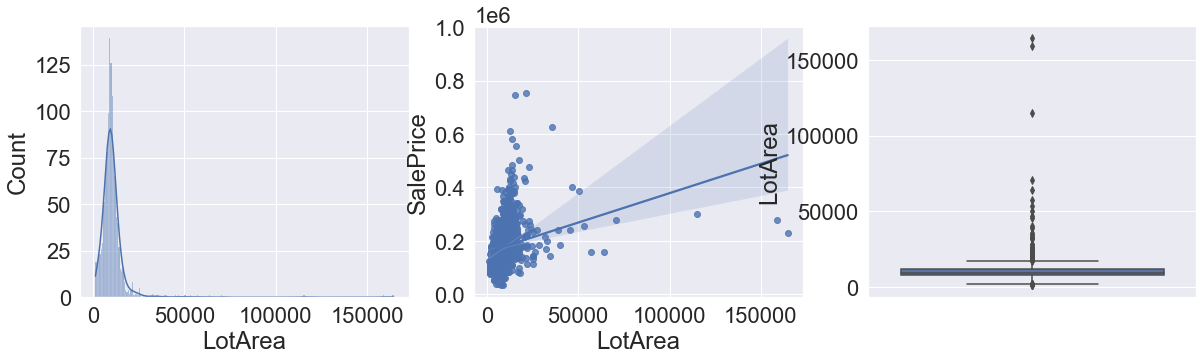

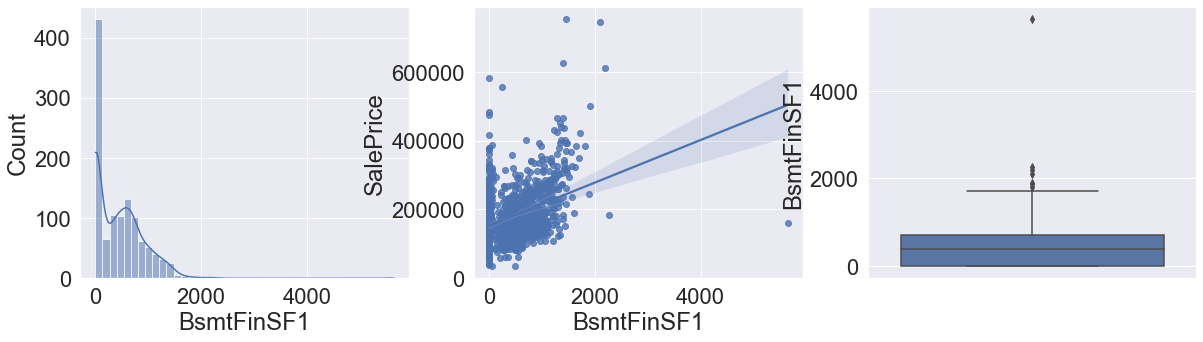

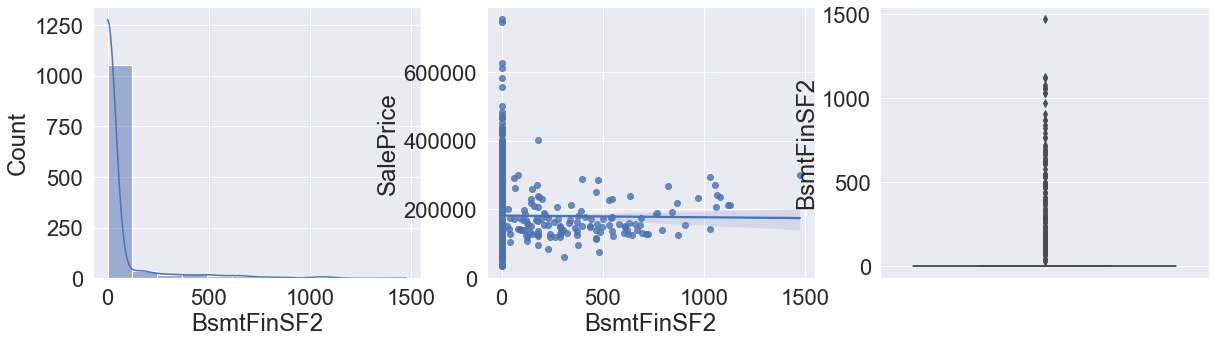

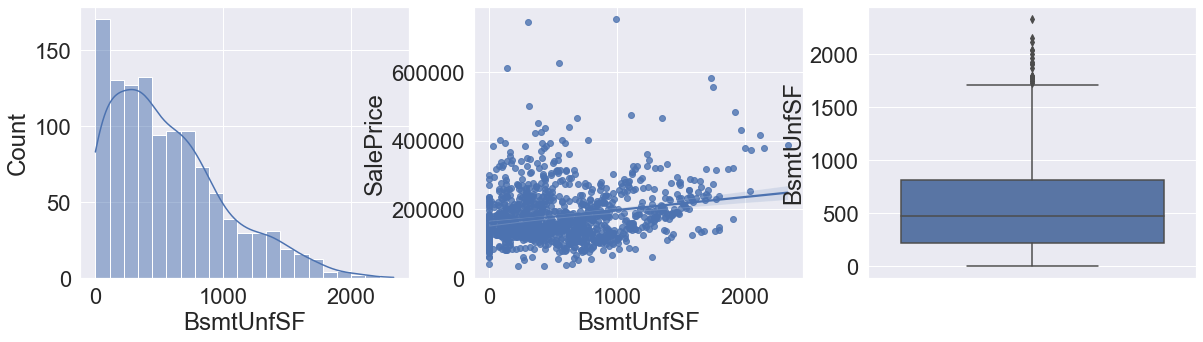

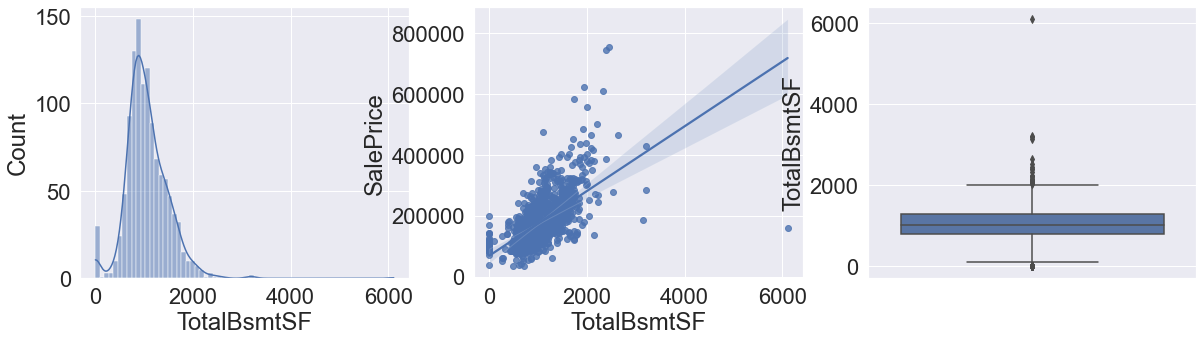

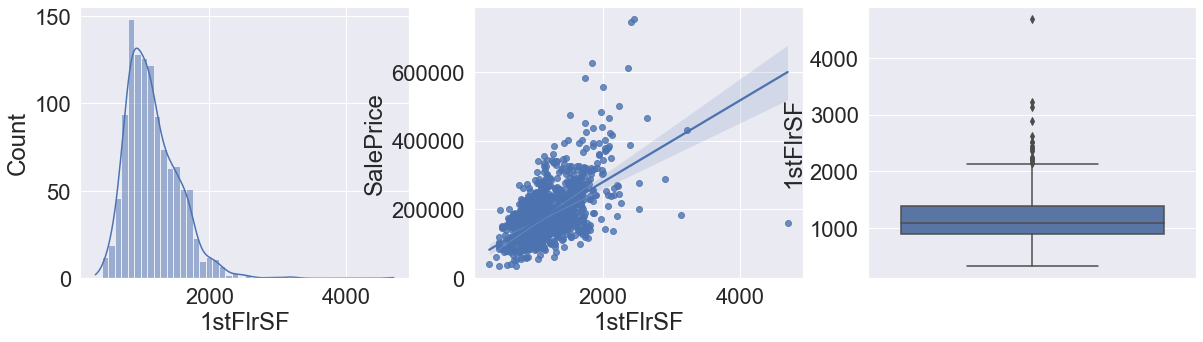

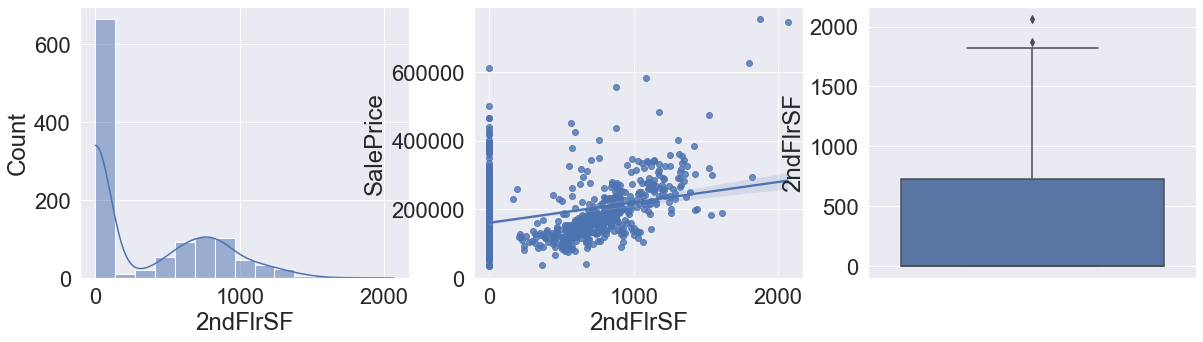

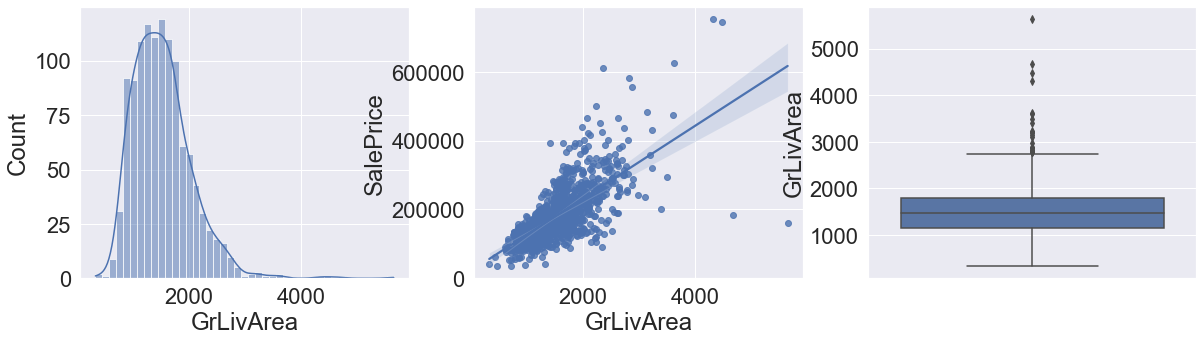

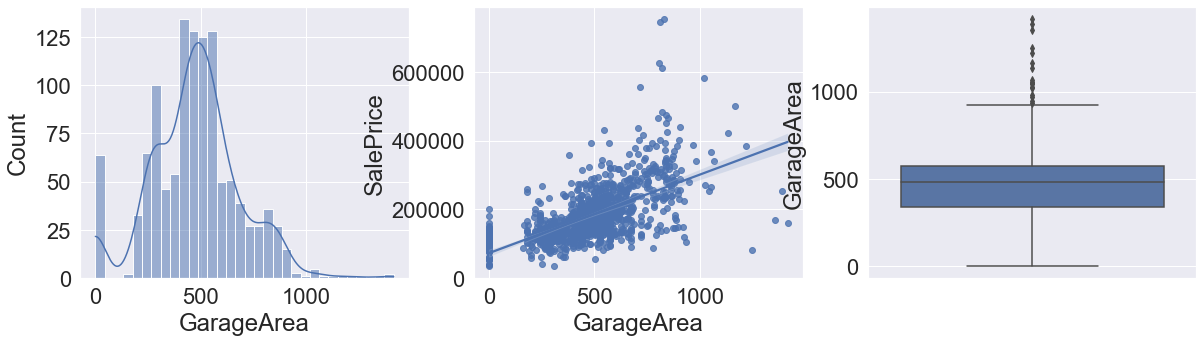

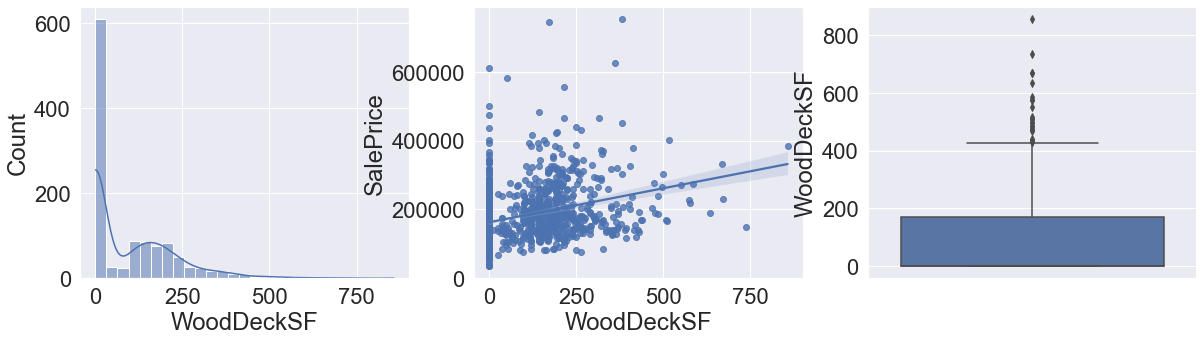

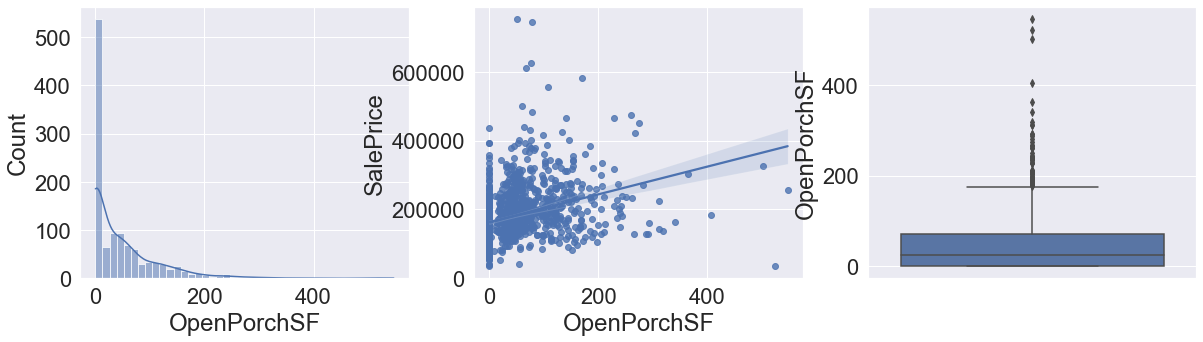

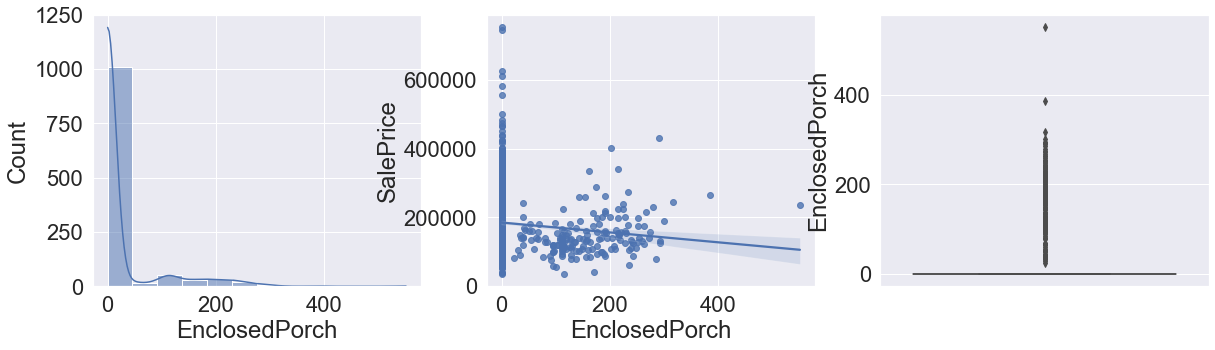

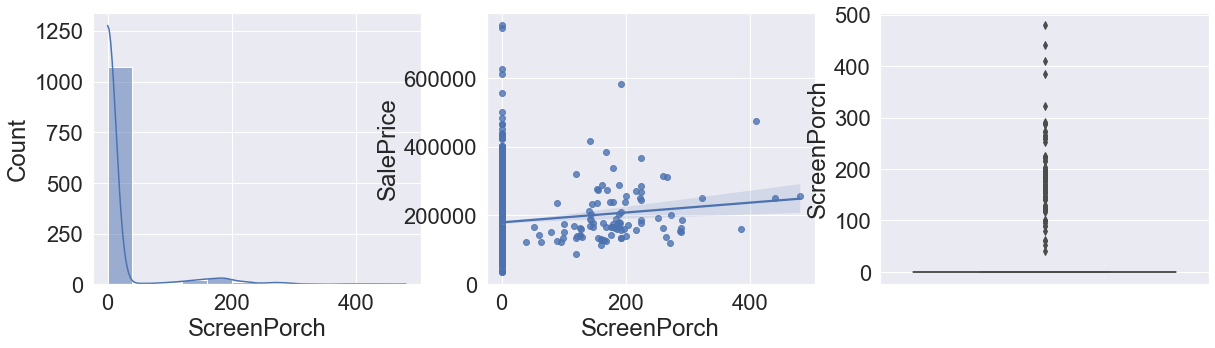

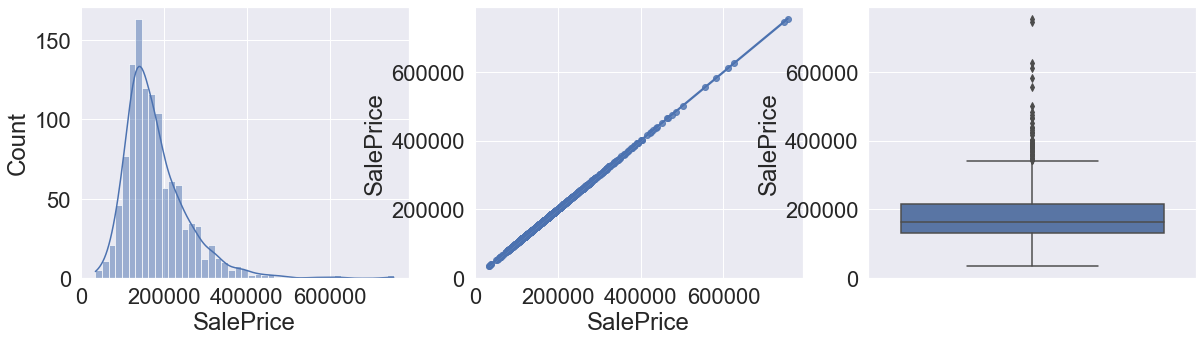

In [72]:
num_plot(train)

In [73]:
print(train.shape)
print(test.shape)

(1168, 76)
(292, 75)


In [74]:
#categorical variables:
categorical_features = [features for features in train.columns if data[features].dtypes == 'O']

In [75]:
print(categorical_features)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [76]:
train[categorical_features].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation Heating HeatingQC  \
0     Plywood     Plywood        TA        TA     CBlock    GasA        TA   
1     Wd Sdng     Wd Sdng        Gd        Gd      PConc    GasA        Ex   
2     MetalSd     MetalSd        Gd        TA      PConc    GasA        Ex   
3     Plywood     Plywood        TA        TA     CBlock    GasA        Ex   
4     CemntBd     CmentBd        Gd        TA     CBlock    GasA        Gd   

  CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0          Y      SBrkr          TA        Typ          Y       WD   
1          Y      SBrkr          Gd        Typ          Y       WD   
2          Y      SBrkr          TA        Typ          Y       WD   
3          Y      SBrkr          TA        Typ          Y      COD   
4          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal

In [323]:
# checking the unique value in each of the columns of the categorical variables
for features in categorical_features:
    print("The feature is {} and the number of categories are {}".format(features,len(train[features].unique())))
    print("The feature is {} and the number of categories are {}".format(features,len(test[features].unique())))
    print("...............................................")

The feature is MSZoning and the number of categories are 5
The feature is MSZoning and the number of categories are 4
...............................................
The feature is Street and the number of categories are 2
The feature is Street and the number of categories are 2
...............................................
The feature is LotShape and the number of categories are 4
The feature is LotShape and the number of categories are 4
...............................................
The feature is LandContour and the number of categories are 4
The feature is LandContour and the number of categories are 4
...............................................
The feature is Utilities and the number of categories are 1
The feature is Utilities and the number of categories are 2
...............................................
The feature is LotConfig and the number of categories are 5
The feature is LotConfig and the number of categories are 5
..............................................

In [89]:
#Now lets plot a bar plot of all the categorical values to understand them better.
def cat_plot(df):
    for i in categorical_features:
        df.groupby(i)['SalePrice'].median().plot.bar()
        plt.show()
        

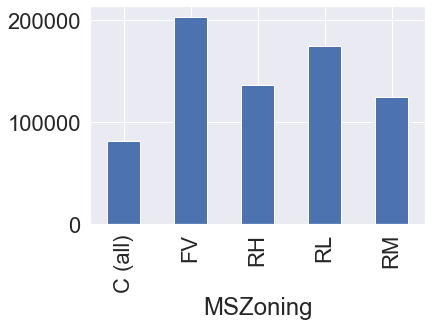

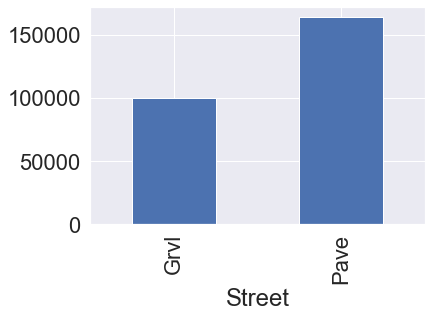

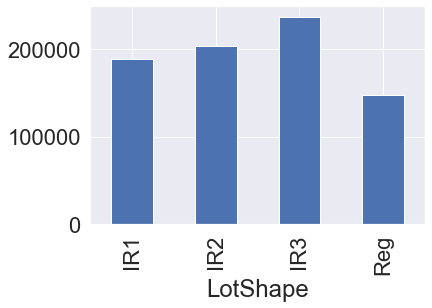

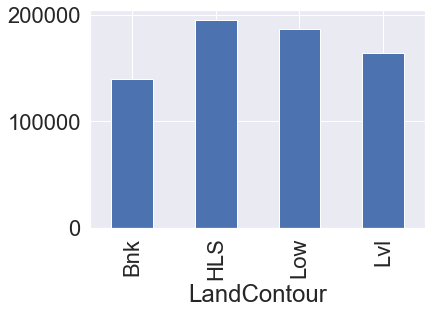

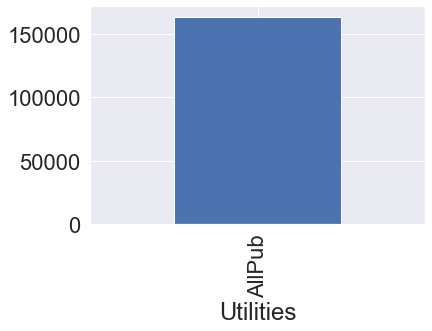

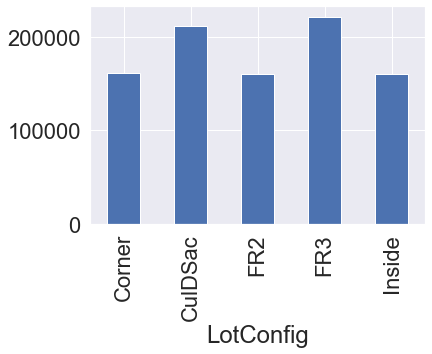

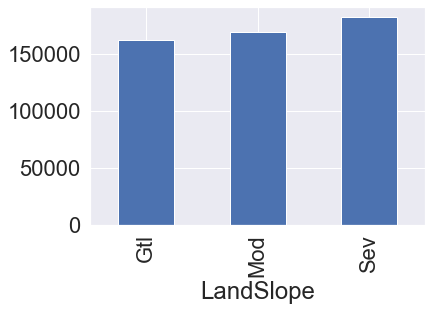

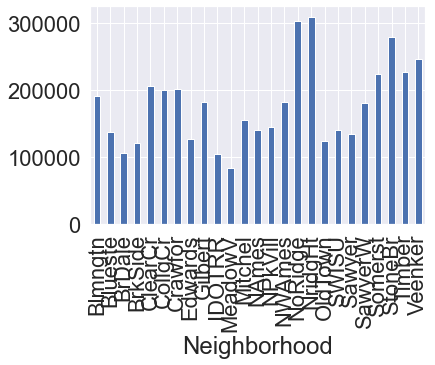

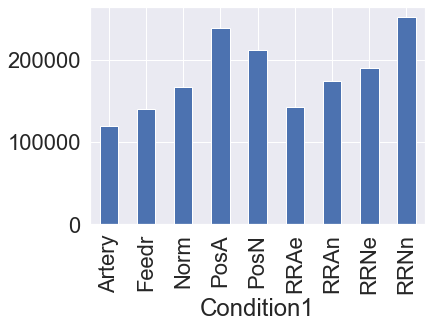

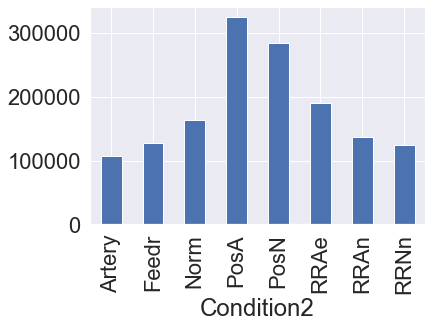

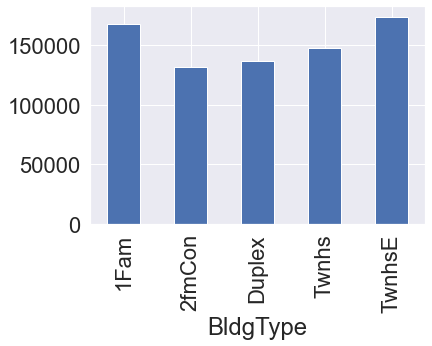

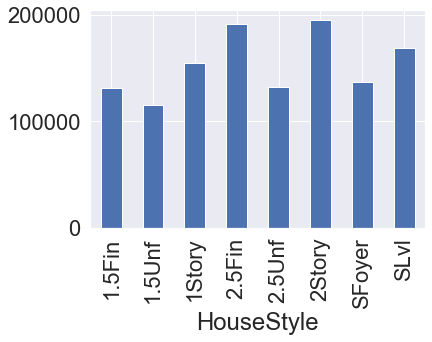

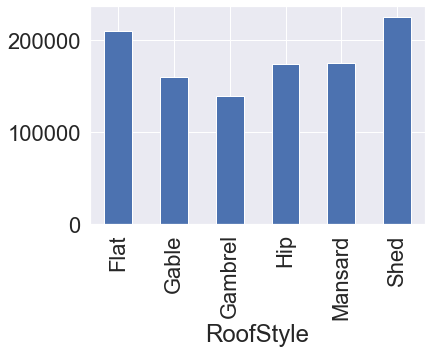

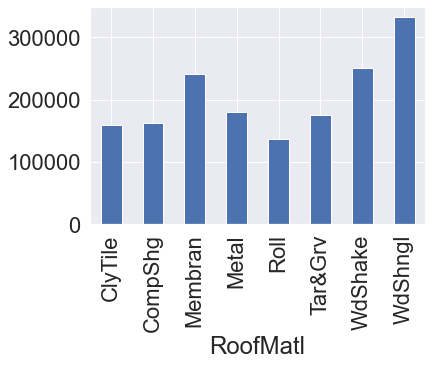

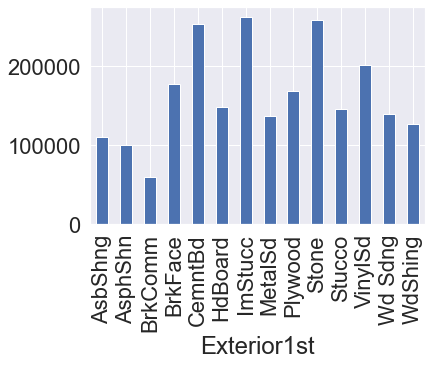

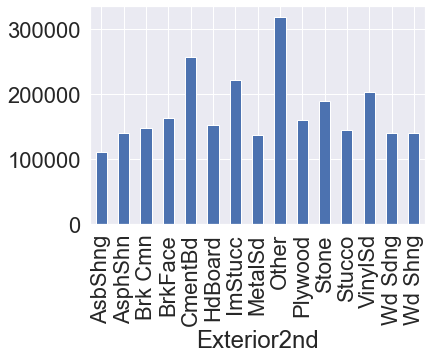

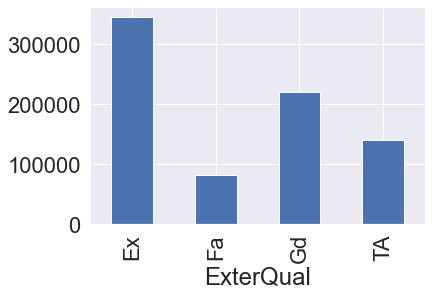

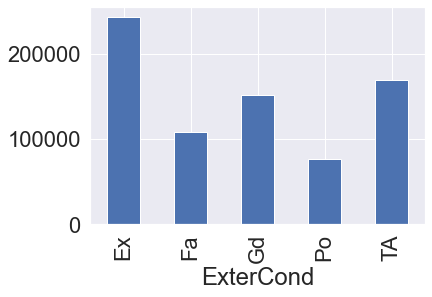

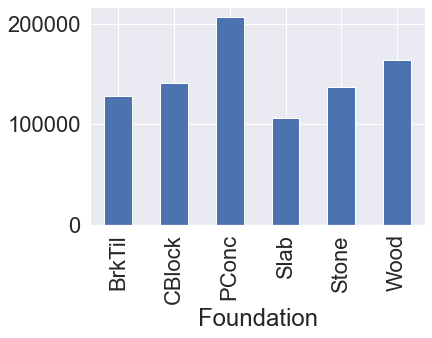

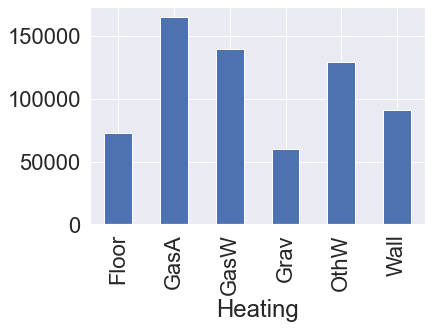

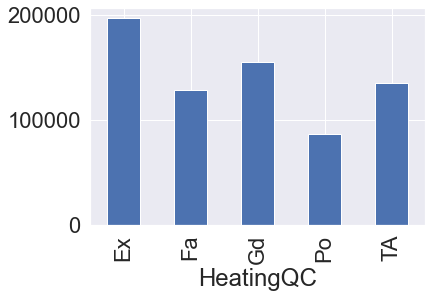

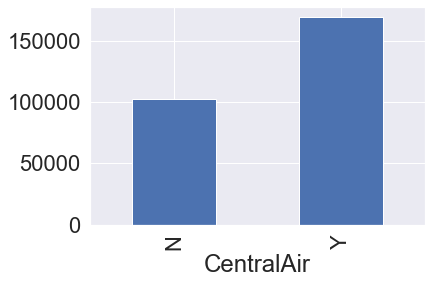

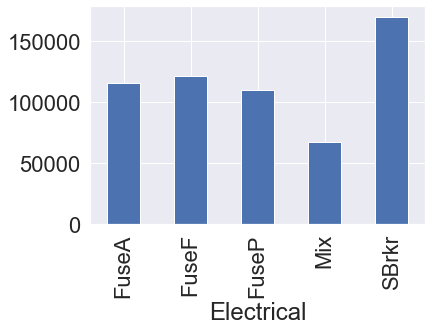

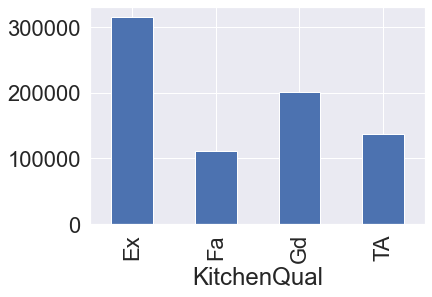

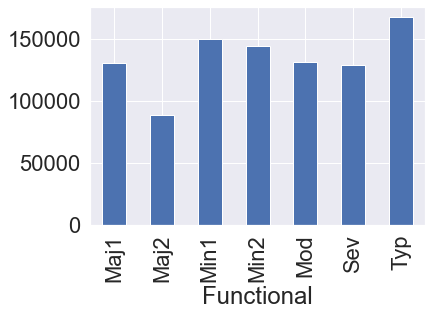

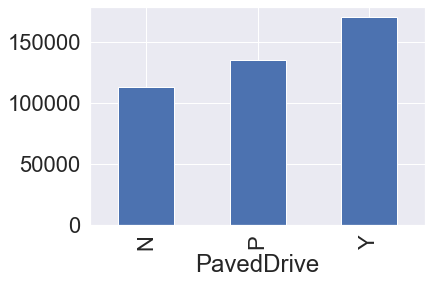

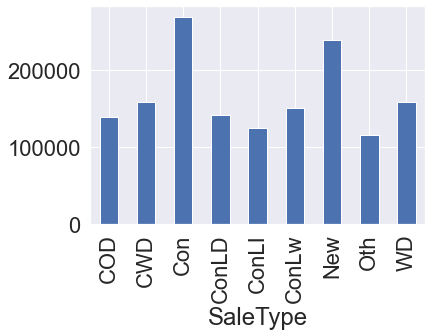

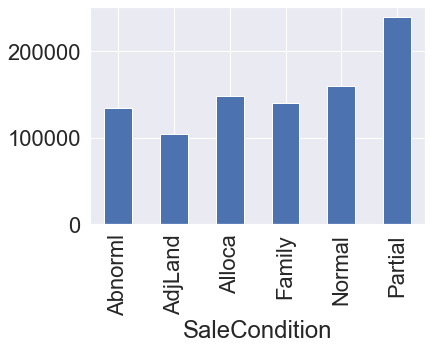

In [90]:
cat_plot(train)

Lets check the data of the target colums to analyze it properly.
We make a histogram plot to analyze the data.

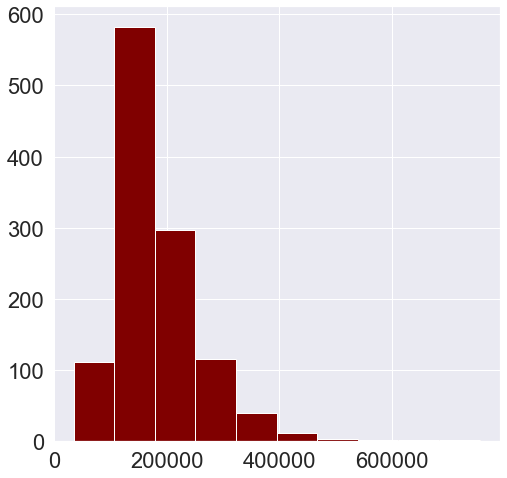

In [94]:
figsize(8,8)

plt.hist(train["SalePrice"], bins =10, color="maroon")
plt.show()

In [ ]:
## Now lets plot and checking the sales type colums and plotting the diagram which contains more than 5.

In [106]:
a=['SaleCondition','SaleType','Neighborhood','Street']

In [180]:
train[a]

SaleCondition SaleType Neighborhood Street
0           Normal       WD      NPkVill   Pave
1           Normal       WD        NAmes   Pave
2           Normal       WD      NoRidge   Pave
3           Normal      COD       NWAmes   Pave
4           Normal       WD       NWAmes   Pave
...            ...      ...          ...    ...
1163        Normal       WD       Sawyer   Pave
1164        Normal       WD      Edwards   Pave
1165        Normal       WD      NPkVill   Pave
1166        Normal       WD       IDOTRR   Pave
1167        Normal       WD      Gilbert   Pave

[1168 rows x 4 columns]

In [109]:
train["SaleType"].describe()

count     1168
unique       9
top         WD
freq       999
Name: SaleType, dtype: object

In [110]:
train["SaleCondition"].describe()

count       1168
unique         6
top       Normal
freq         945
Name: SaleCondition, dtype: object

In [182]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     127         120       RL          NaN     4928   Pave      IR1   
1     889          20       RL         95.0    15865   Pave      IR1   
2     793          60       RL         92.0     9920   Pave      IR1   
3     110          20       RL        105.0    11751   Pave      IR1   
4     422          20       RL          NaN    16635   Pave      IR1   
...   ...         ...      ...          ...      ...    ...      ...   
1163  289          20       RL          NaN     9819   Pave      IR1   
1164  554          20       RL         67.0     8777   Pave      Reg   
1165  196         160       RL         24.0     2280   Pave      Reg   
1166   31          70  C (all)         50.0     8500   Pave      Reg   
1167  617          60       RL          NaN     7861   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   
...          

In [183]:
saletypes=train['SaleType'].unique()
salecond=train['SaleCondition'].unique()
ntypes=train['Neighborhood'].unique()


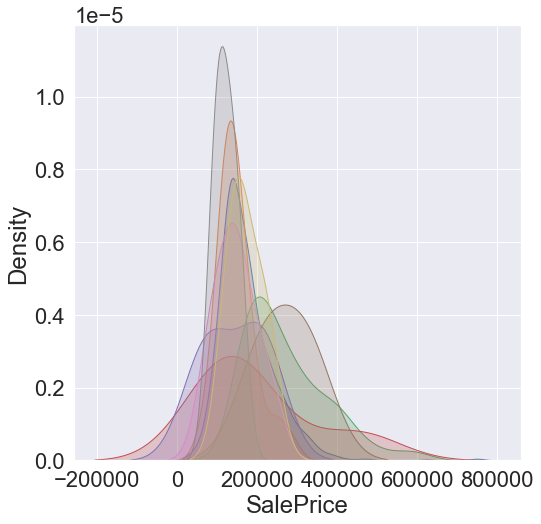

In [116]:
figsize(8,8)

for s in saletypes:
    subset = train[train["SaleType"]==s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade= True, label=s)

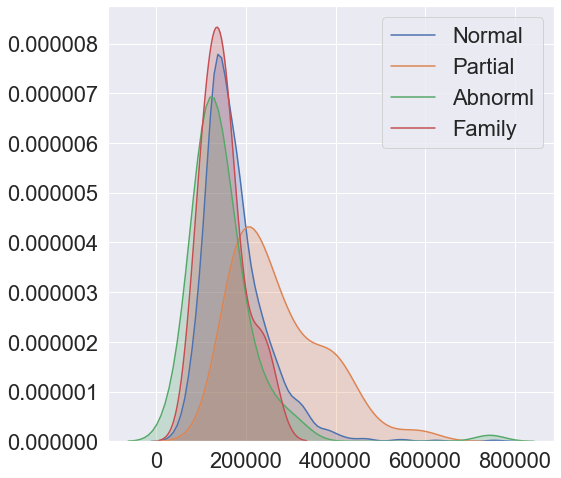

In [38]:
figsize(8,8)

for sc in salecond:
    subset = train[train["SaleCondition"]==sc]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=sc)

In [39]:
ntypes = train["Neighborhood"].value_counts()
ntypes = list(ntypes[ntypes.values>87].index)
ntypes

['NAmes', 'CollgCr', 'OldTown', 'Edwards']

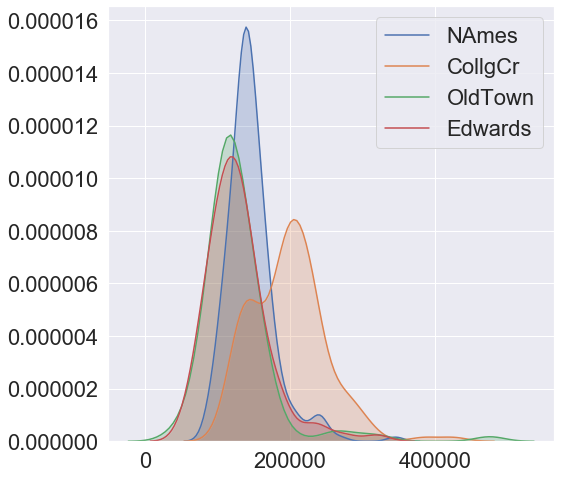

In [40]:
for n in ntypes:
    subset = train[train["Neighborhood"]==n]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True, label=n)

In [119]:
street = train["Street"].value_counts()
street = list(street.index)

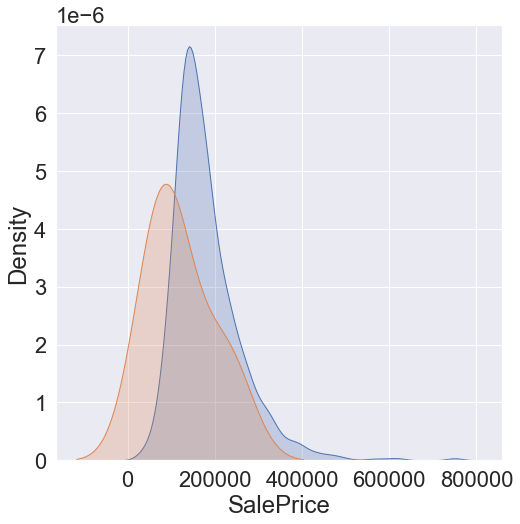

In [120]:
for s in street:
    subset = train[ train["Street"] == s]
    sns.kdeplot(subset["SalePrice"].dropna(), shade=True,label=s)

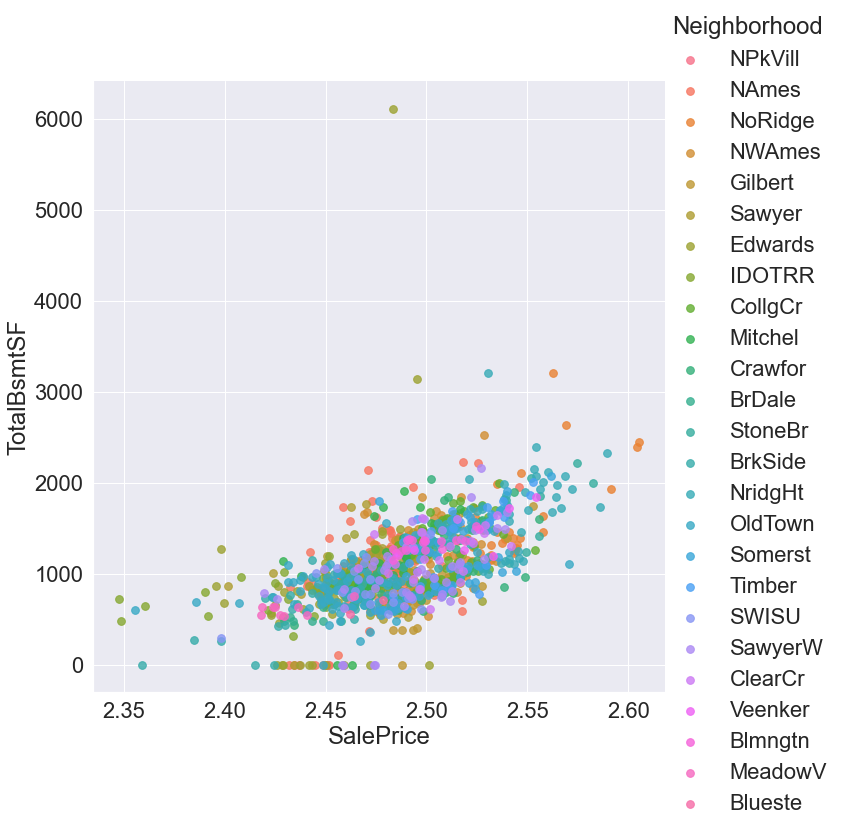

In [127]:
figsize(8,8)
data = train[train["Neighborhood"].isin(ntypes)]
sns.lmplot(x="SalePrice", y="TotalBsmtSF", hue="Neighborhood", data = data.dropna(), 
           scatter_kws={"alpha":0.8,"s":60}, size=10, fit_reg=False)
plt.show()

Lets PLot a correlation heatmap to understand the Feature to feature and feature to label interactions better.

<AxesSubplot:>

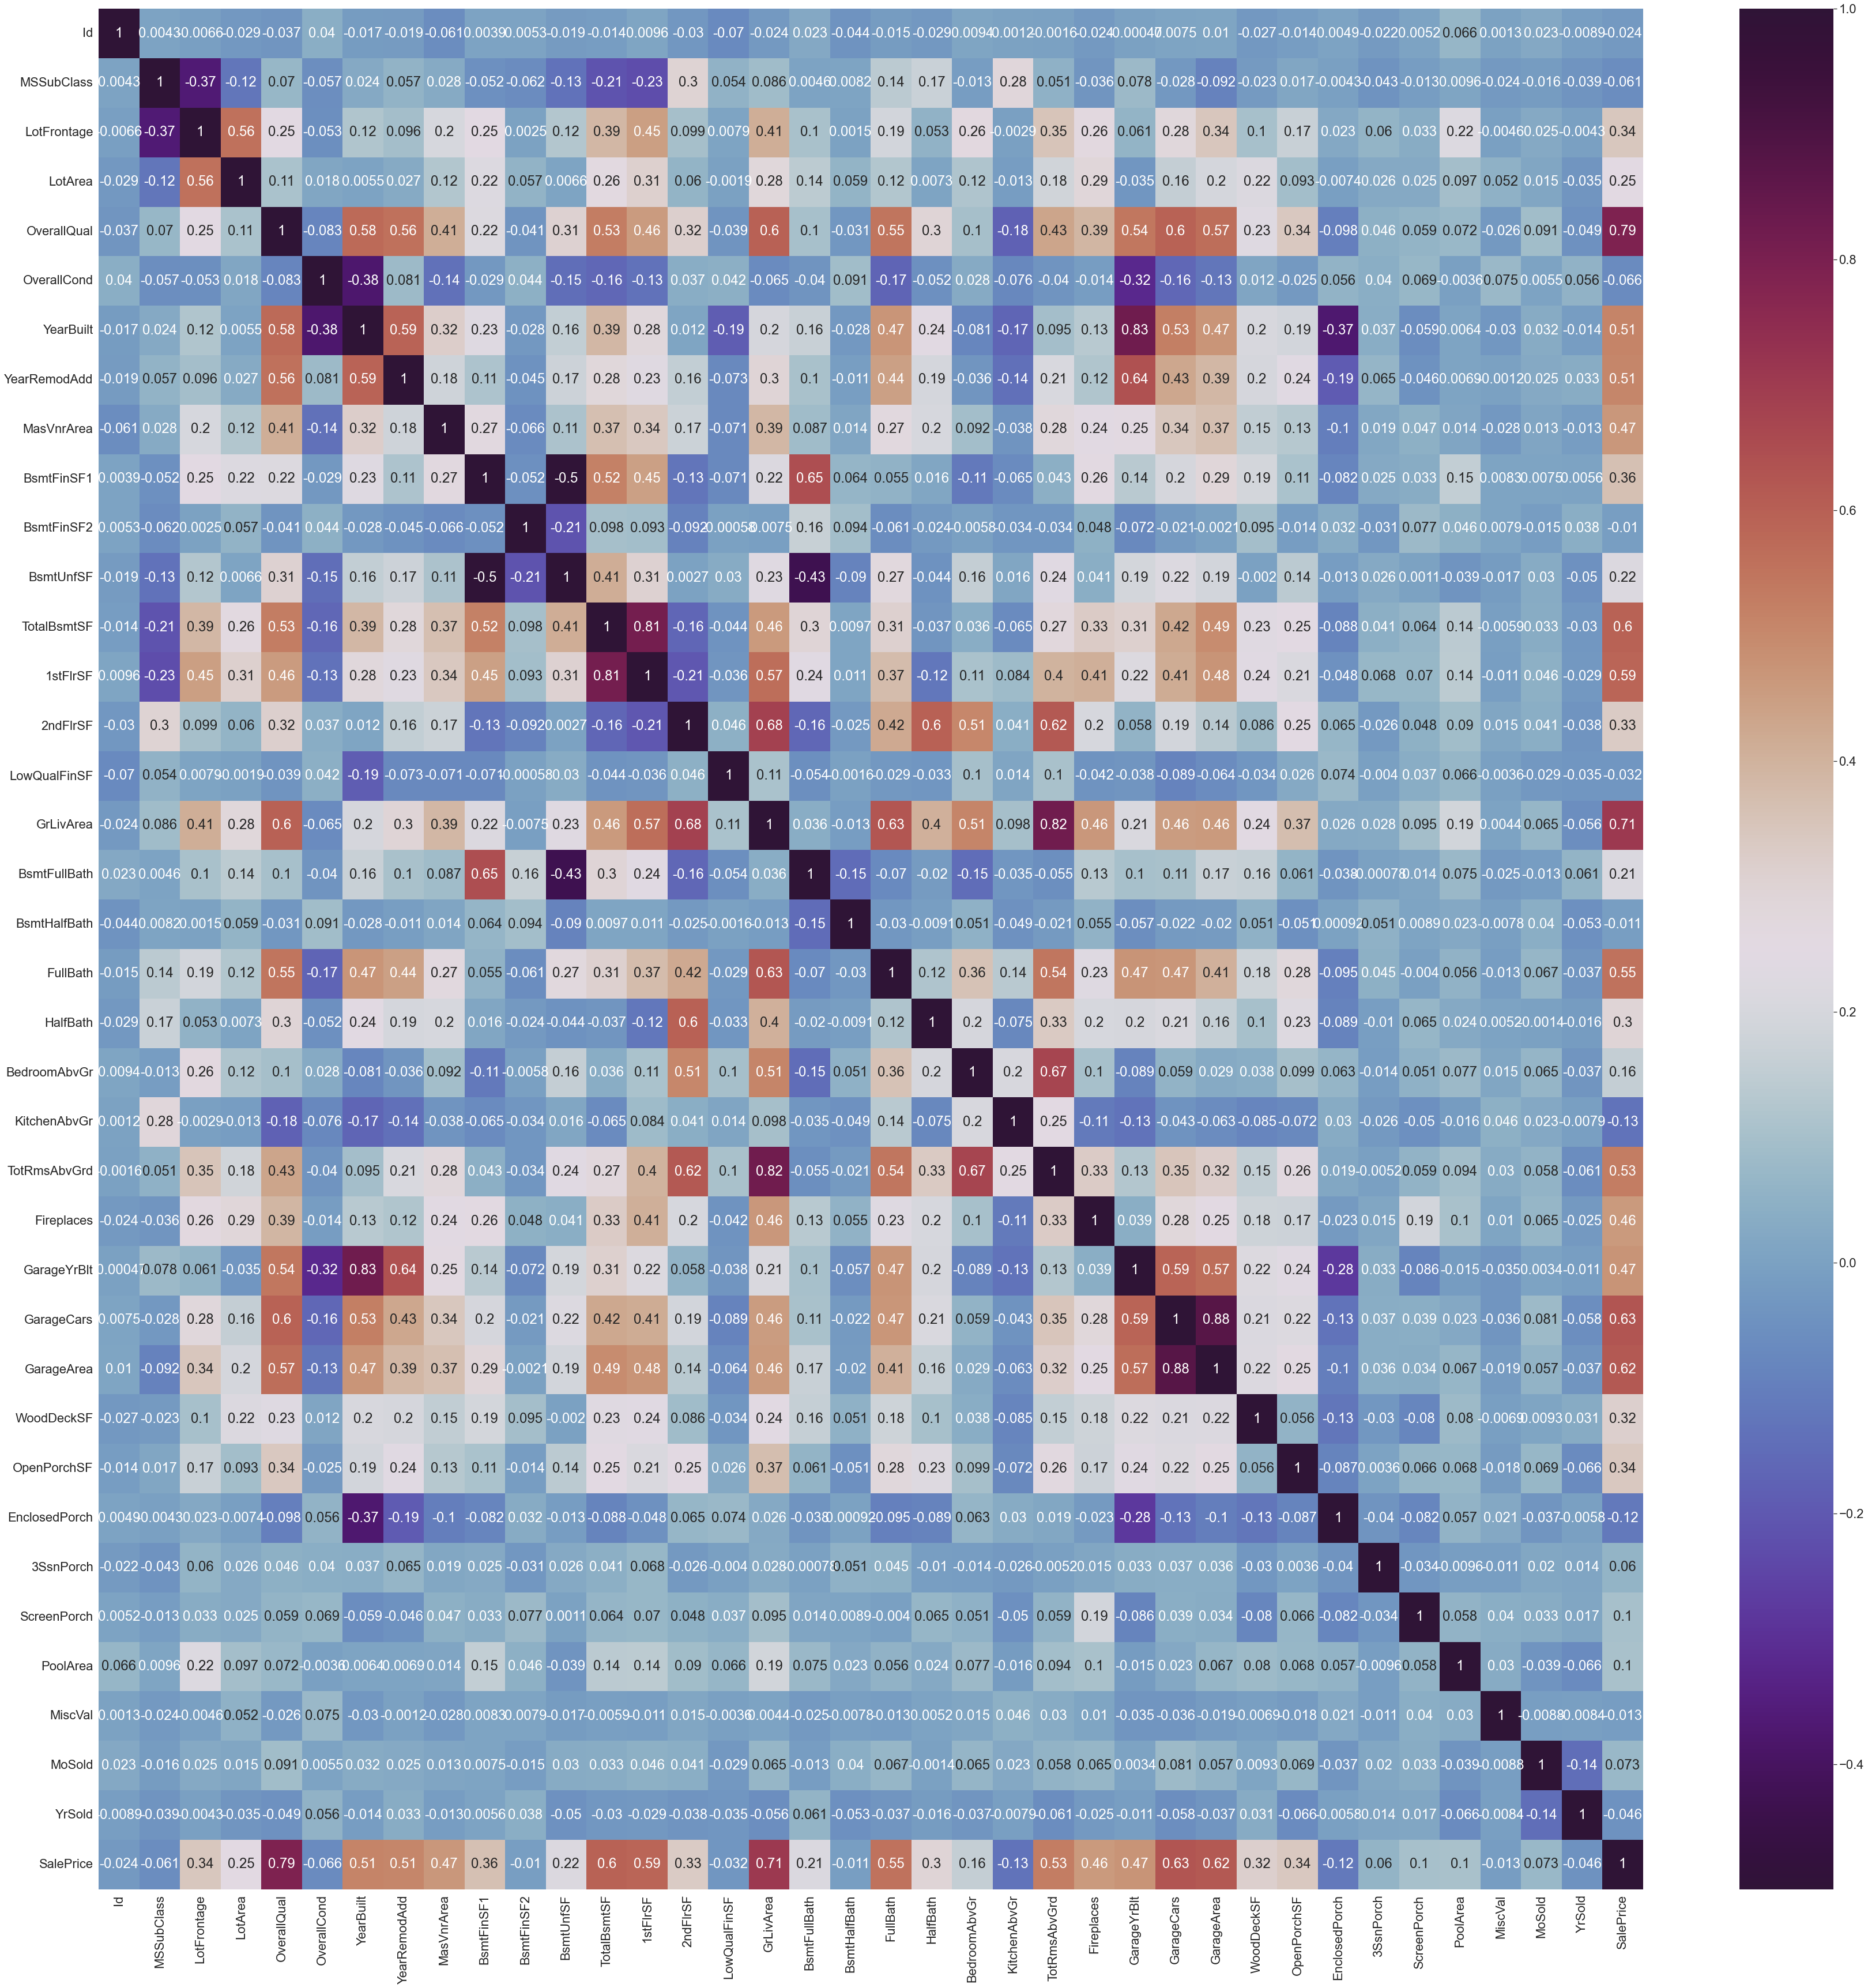

In [324]:
#Heatmap with correlation values
d=train.corr()
plt.figure(figsize=(60,60))
sns.heatmap(d,cmap='twilight_shifted',annot=True)

In [325]:
#correlation values with regard to saleprice
correlation = train.corr()
correlation["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePr

# Step3: Feature Selection and Engineering

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

In [186]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     127         120       RL          NaN     4928   Pave      IR1   
1     889          20       RL         95.0    15865   Pave      IR1   
2     793          60       RL         92.0     9920   Pave      IR1   
3     110          20       RL        105.0    11751   Pave      IR1   
4     422          20       RL          NaN    16635   Pave      IR1   
...   ...         ...      ...          ...      ...    ...      ...   
1163  289          20       RL          NaN     9819   Pave      IR1   
1164  554          20       RL         67.0     8777   Pave      Reg   
1165  196         160       RL         24.0     2280   Pave      Reg   
1166   31          70  C (all)         50.0     8500   Pave      Reg   
1167  617          60       RL          NaN     7861   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   
...          

In [168]:

nun=pd.DataFrame({"Features":train1.columns,'Train unique':train1.nunique(),'Test unique': test.nunique()}).T
nun

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
Features        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street   
Train unique  1168          15         5            2      892       2   
Test unique    292          15         4           65      249       2   

              LotShape  LandContour  Utilities  LotConfig  LandSlope  \
Features      LotShape  LandContour  Utilities  LotConfig  LandSlope   
Train unique         4            4          1          5          3   
Test unique          4            4          2          5          3   

              Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
Features      Neighborhood  Condition1  Condition2  BldgType  HouseStyle   
Train unique            25           9           8         5           8   
Test unique             24           8           2         5           8   

              OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
Features      OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle   
Train unique           10            9        110            61          6   
Test unique             8            7         84            57          5   

              RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
Features      RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea   
Train unique         8           14           15           2           2   
Test unique          3           12           14           4         104   

              ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
Features      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
Train unique          4          5           6         2         2   
Test unique           4          4           6         4         3   

              BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
Features      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2   
Train unique             2             2         551             2   
Test unique              4             6         184             6   

              BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  \
Features      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC   
Train unique         122        681          636        6          5   
Test unique           32        231          224        4          4   

              CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Features      CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
Train unique           2           5       669       351            21   
Test unique            2           4       238       113             4   

              GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Features      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath   
Train unique        746             4             3         4         3   
Test unique         246             3             2         4         3   

              BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
Features      BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   
Train unique             8             4            4            12   
Test unique              7             3            4            10   

              Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  \
Features      Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish   
Train unique           7           4           2            2             2   
Test unique            6           3           6           71             3   

              GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
Features      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive   
Train unique           5         392           2           2           3   
Test unique            5         166           5           5           3   

              WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
Features      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  Screen

In [363]:
# Creating the Dummies of the categoical datas. this listed data has more impact on the target.
def new_checkpoint(df):
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "SalePrice":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
            
    cat_cols = ["Foundation","Street","PavedDrive","LandContour","GarageFinish"]
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    return features 

In [364]:
train_new = new_checkpoint(train)
test_new = new_checkpoint(test)

In [365]:
print(train_new.shape)
print(test_new.shape)

(1168, 130)
(292, 129)


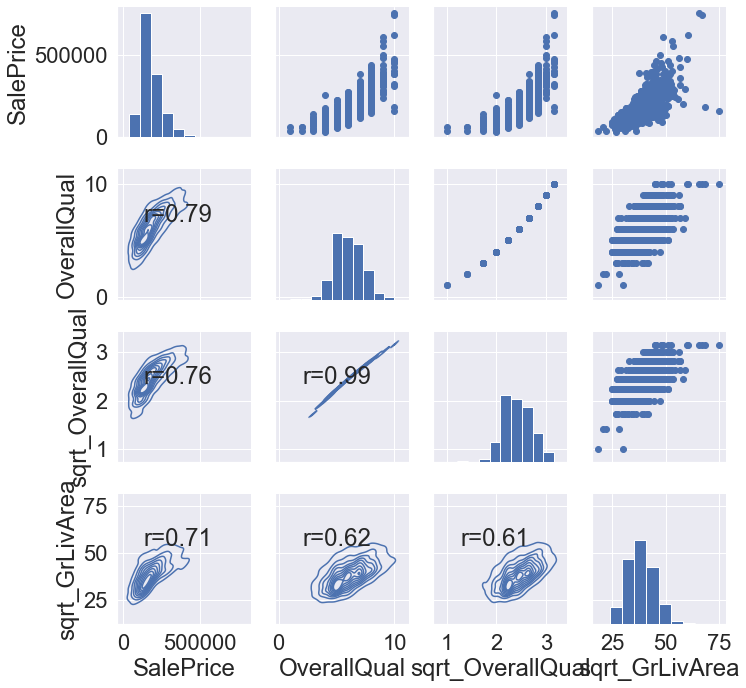

In [366]:
columns = ["SalePrice", "OverallQual", "sqrt_OverallQual","sqrt_GrLivArea"]
plot_data = train_new[columns]

figsize(12,12)
def r_funct(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r={:.2}".format(r), xy=(0.2,0.6), xycoords = ax.transAxes)

plot = sns.PairGrid(plot_data)
plot.map_upper(plt.scatter)
plot.map_diag(plt.hist)
plot.map_lower(r_funct)
plot.map_lower(sns.kdeplot)
plt.show()

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

In [382]:

LE=LabelEncoder()
train_neww=LE.fit_transform(train['Neighborhood','GarageType','RoofStyle'])
test_neww=LE.fit_transform(test['Neighborhood','GarageType','RoofStyle'])

In [402]:
train_neww=train_new.assign(RoofStyle=RS_train,Neighborhood=Neigh_train,GarageType=GT_train)
test_neww=test_new.assign(RoofStyle=RS_test,Neighborhood=Neigh_test,GarageType=GT_test)

In [403]:
train_neww

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

In [404]:
test_neww

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     337          20         86.0    14157            9            5   
1    1018         120          NaN     5814            8            5   
2     929          20          NaN    11838            8            5   
3    1148          70         75.0    12000            7            7   
4    1227          60         86.0    14598            6            5   
..    ...         ...          ...      ...          ...          ...   
287    83          20         78.0    10206            8            5   
288  1048          20         57.0     9245            5            5   
289    17          20          NaN    11241            6            7   
290   523          50         50.0     5000            6            7   
291  1379         160         21.0     1953            6            5   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         2005          2006       200.0        1249           0        673   
1         1984          1984         0.0        1036           0        184   
2         2001          2001         0.0           0           0       1753   
3         1941          1950         0.0         275           0        429   
4         2007          2007        74.0           0           0        894   
..         ...           ...         ...         ...         ...        ...   
287       2007          2007       468.0          33           0       1530   
288       1994          1995         0.0         686           0        304   
289       1970          1970       180.0         578           0        426   
290       1947          1950         0.0         399           0        605   
291       1973          1973       408.0         309           0        174   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           1922      1922         0             0       1922             1   
1           1220      1360         0             0       1360             1   
2           1753      1788         0             0       1788             0   
3            704       860       704             0       1564             0   
4            894       894      1039             0       1933             0   
..           ...       ...       ...           ...        ...           ...   
287         1563      1563         0             0       1563             0   
288          990       990         0             0        990             0   
289         1004      1004         0             0       1004             1   
290         1004      1004       660             0       1664             0   
291          483       483       504             0        987             0   

     BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0               0         2         0             3             1   
1               0         1         0             1             1   
2               0         2         0             3             1   
3               0         1         1             3             1   
4               0         2         1             4             1   
..            ...       ...       ...           ...           ...   
287             0         2         0             3             1   
288             1         1         0             3             1   
289             0         1         0             2             1   
290             0         2         0             3             1   
291             0         1         1             2             1   

     TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0               8           1       2005.0           3         676   
1               4           1       1984.0           2         565   
2               7           1       2001.0           2         522   
3               7           1       1941.0           1         234   
4               9           1       2007.0           

In [ ]:
#Neigh_train,GT_train,RS_train

In [405]:
# Creating a function to remove Collineariity in both the train and test dataset
def remove_colinear(x, x_test,  threshold):
    y = x["SalePrice"]
    x = x.drop("SalePrice",1)
    cor_ = x.corr()
    drop_cols = []
    cols = list(cor_.columns)
    cols = range(len(cols)-1)
    for i in list(cols):
        for j in range(i):
            item = cor_.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    x = x.drop(columns = drops, axis=1)
    x["SalePrice"]=y
    x_test = x_test.drop(columns=drops,axis =1)
    return x, x_test

In [406]:
# Data after removing the collinerity
train_new1, test_new1 = remove_colinear(train_neww,test_neww,0.6)

In [407]:
print(test_new1.shape)
print(train_new1.shape)

(292, 48)
(1168, 49)


# Split Into Training and Testing Sets

In [408]:
features = train_new1.drop("SalePrice", axis=1)
targets = train_new1["SalePrice"]

In [409]:
X, X_test, y, y_test = train_test_split(features,targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(817, 48)
(351, 48)
(817,)
(351,)


In [410]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Foundation_BrkTil', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Street_Grvl', 'Street_Pave',
       'PavedDrive_N', 'PavedDrive_P', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'GarageFinish_Fin', 'GarageFinish_Unf', 'RoofStyle',
       'Neighborhood', 'GarageType'],
      dtype='object')

In [411]:
test_new1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Foundation_BrkTil', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'Street_Grvl', 'Street_Pave',
       'PavedDrive_N', 'PavedDrive_P', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'GarageFinish_Fin', 'GarageFinish_Unf', 'RoofStyle',
       'Neighborhood', 'GarageType'],
      dtype='object')

# Step:4 Evaluating and Comparing Machine Learning Models

In this section we will build, train, and evalute several machine learning methods for our supervised regression task. The objective is to determine which model holds the most promise for further development (such as hyperparameter tuning).

# Imputing Missing Values

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 40% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation.

There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the median of the column.

In [413]:

imputer = SimpleImputer(strategy = "median")
imputer.fit(X,y)
X= imputer.transform(X)
X_test= imputer.transform(X_test)
test_new = imputer.transform(test_new1)

In [414]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

print('Missing values in test_new features:  ', np.sum(np.isnan(test_new)))

Missing values in training features:  0
Missing values in testing features:   0
Missing values in test_new features:   0


In [415]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

print(np.where(~np.isfinite(test_new)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


# Scaling Feature

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm.It is a best practice to scale features when we are comparing multiple algorithms.

In [417]:

scaler = MinMaxScaler (feature_range=(0,1))
scaler.fit(X,y)

X = scaler.transform(X)
X_test = scaler.transform(X_test)

test_new = scaler.transform(test_new)

In [418]:
# Convert y and y_test to one-dimensional array (vector)
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [420]:
# Function to calculate root mean square error
def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [421]:
# Takes in a model, trains the model, and evaluates the model on the test set
def model_test(model):
    model.fit(X,y)
    predictions = model.predict(X_test)
    model_rsme = rmse(y_test,predictions)
    return model_rsme

In [422]:
lr = LinearRegression()
lr_rsme = model_test(lr)
print(" the root mean squared error for linear regression is:", lr_rsme)

 the root mean squared error for linear regression is: 41239.52667080976


In [423]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_rsme = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)

 the root mean squared error for K nearest neighbors is: 49394.95528008268


In [424]:
svm = SVR()
svm_rsme = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)

 the root mean squared error for Support vector machine is: 84347.0591693576


In [425]:
tree = DecisionTreeRegressor()
tree_rsme = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)

 the root mean squared error for decision tree is: 44293.49748949446


In [426]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf_rsme = model_test(rf)
gb_rsme = model_test(gb)
print(" the root mean squared error for randoom forest is:", rf_rsme)
print(" the root mean squared error for gradient boosting is:", gb_rsme)

 the root mean squared error for randoom forest is: 34252.79803536534
 the root mean squared error for gradient boosting is: 34723.39533312979


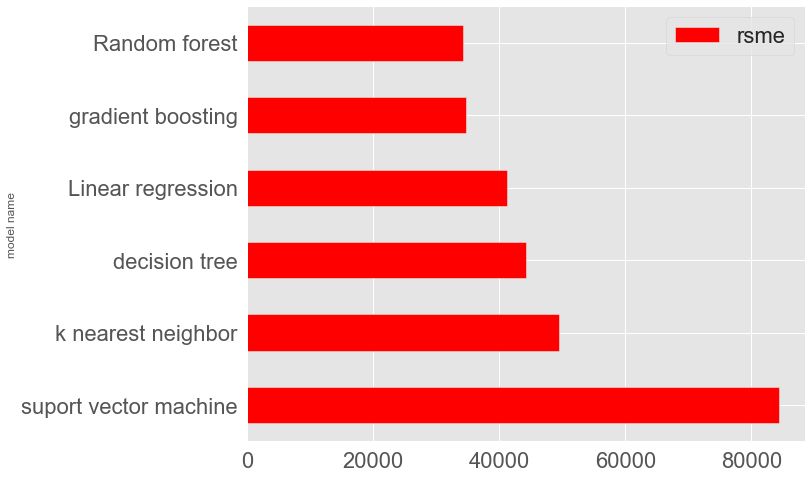

In [427]:
# Plotting in the graph of the rootmean square

figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree", "Random forest", "gradient boosting"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,rf_rsme,gb_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

From the above plot the gradient boosting regressor performs the best followed by the random forest. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. 

Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!

# Step 5: Model Optimization

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model 

We will start with: 

1. Hyperparameter Tuning with Random Search
2. Hyperparameter Tuning with Random Search Cross Validation

In [428]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gf = GradientBoostingRegressor(random_state=42)

# Setting the parameters to gain the best results

loss = ['ls', 'lad', 'huber', 'quantile']
n_estimators = [100, 300, 500,700, 900, 1100, 1300]
min_samples_split = [2,3,4,6,8,10,12]
min_samples_leaf = [1,2,4,5,6,7,8]
max_depth =[2,3,4,5,6,7,8]
max_features = ["auto","sqrt","log2",None]

hyperparameter_grid = {"loss":loss,
                      "n_estimators":n_estimators,
                      "min_samples_split":min_samples_split,
                      "max_depth":max_depth,
                      "min_samples_leaf":min_samples_leaf,
                      "max_features":max_features}



random_cv = RandomizedSearchCV(estimator=gf, param_distributions = hyperparameter_grid, cv=5,
                              n_iter=30, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1,
                              return_train_score=True, random_state=42)

In [429]:
#fitting the model with random search CV
random_cv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 7,
                                                             8],
                                        'min_samples_split': [2, 3, 4, 6, 8, 10,
                                                              12],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [430]:
rand_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
rand_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.499188      0.008369         0.000199        0.000399   
10       0.473529      0.008618         0.006249        0.007654   
11       2.089899      0.008685         0.003125        0.006250   
14      11.937741      0.188006         0.007255        0.009026   
29       1.797283      0.202623         0.000000        0.000000   
4        0.072176      0.008529         0.003125        0.006251   
7        4.504517      0.015727         0.000000        0.000000   
17       0.784814      0.012315         0.016321        0.001376   
26       0.252352      0.005831         0.003125        0.006250   
21       0.812018      0.009512         0.000000        0.000000   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
15                300                       6                      6   
10               1300                       8                      2   
11                900                       8                      1   
14               1100                       6                      2   
29               1100                       6                      2   
4                 100                      12                      2   
7                 700                       3                      1   
17               1100                       6                      6   
26                500                      10                      5   
21                100                       3                      7   

   param_max_features param_max_depth param_loss  \
15               sqrt               2      huber   
10               log2               2         ls   
11               None               3         ls   
14               None               7        lad   
29               sqrt               3        lad   
4                log2               6         ls   
7                auto               4      huber   
17               log2               6         ls   
26               sqrt               3         ls   
21               sqrt               8        lad   

                                               params  split0_test_score  \
15  {'n_estimators': 300, 'min_samples_split': 6, ...      -16211.030507   
10  {'n_estimators': 1300, 'min_samples_split': 8,...      -16706.473855   
11  {'n_estimators': 900, 'min_samples_split': 8, ...      -15343.049526   
14  {'n_estimators': 1100, 'min_samples_split': 6,...      -15522.487981   
29  {'n_estimators': 1100, 'min_samples_split': 6,...      -15480.394315   
4   {'n_estimators': 100, 'min_samples_split': 12,...      -16410.813335   
7   {'n_estimators': 700, 'min_samples_split': 3, ...      -16375.244818   
17  {'n_estimators': 1100, 'min_samples_split': 6,...      -16798.692159   
26  {'n_estimators': 500, 'min_samples_split': 10,...      -17740.082318   
21  {'n_estimators': 100, 'min_samples_split': 3, ...      -15795.397318   

    split1_test_score  split2_test_score  split3_test_score  \
15      -18923.989920      -18293.612859      -17574.379458   
10      -18690.952034      -17752.055662      -17723.702536   
11      -18713.487374      -21353.908765      -16593.403124   
14      -20182.073761      -18526.298336      -18036.919914   
29      -19694.666885      -17718.240731      -17958.182982   
4       -19798.213865      -18266.913634      -17710.834869   
7       -19307.569545      -20871.142537      -17881.139489   
17      -18582.861700      -19250.615491      -17636.584604   
26      -18781.454921      -18791.805985      -16890.568796   
21      -20455.530573      -19365.933615      -17869.626966   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
15      -19845.528408    -18169.708230     1231.543849                1   
10      -20860.895290    -18346.815875     1405.116144                2   
11      -19762.973007    -18353.364359     2157.749328                3   
14      -19741.012359    -18401.758470     1637.189019    

In [431]:
rand_results[["mean_test_score","mean_train_score"]].head()

mean_test_score  mean_train_score
15    -18169.708230     -10826.052404
10    -18346.815875      -4692.115057
11    -18353.364359      -1090.557985
14    -18401.758470      -1083.456142
29    -18406.357353      -6062.554807

In [432]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=2, max_features='sqrt',
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=300, random_state=42)

In [474]:
print ('Best Parameters: ', random_cv.best_params_, ' \n')

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 2, 'loss': 'huber'}  



Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.

In [475]:
trees_grid = {"n_estimators":[300],
             }

gf = GradientBoostingRegressor(criterion='friedman_mse',
                           loss='lad', max_depth=2,
                          max_features='sqrt',
                          min_impurity_decrease=0.0,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0,
                          random_state=42, subsample=1.0
                          )
grid_search = GridSearchCV(estimator=gf,
    param_grid=trees_grid,scoring="neg_root_mean_squared_error",n_jobs=-1,cv=10,verbose=1,
                           return_train_score=True)

In [476]:
grid_search.fit(X,y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=2,
                                                 max_features='sqrt',
                                                 min_samples_leaf=4,
                                                 min_samples_split=4,
                                                 random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [300]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [480]:
results = pd.DataFrame(grid_search.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.413057        0.0207              0.0             0.0   

  param_n_estimators                 params  split0_test_score  \
0                300  {'n_estimators': 300}      -26320.431109   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0      -23876.945972      -36826.447104      -25974.744312      -30102.545223   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0      -35214.126329      -28637.604387      -29117.376858      -48848.875488   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  \
0      -34301.975122     -31922.10719     6931.875592                1   

   split0_train_score  split1_train_score  split2_train_score  \
0       -25329.548799       -24213.875358       -24055.524551   

   split3_train_score  split4_train_score  split5_train_score  \
0       -24287.076549       -24929.315718       -23609.132431   

   split6_train_score  split7_train_score  split8_train_score  \
0       -23899.695206       -25590.199349       -20255.130161   

   split9_train_score  mean_train_score  std_train_score  
0       -24218.964951     -24038.846307      1396.819394

     ------------------------------------ 455.9/455.9 MB 217.3 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 162.7 kB/s eta 0:00:00
     -------------------------------------- 42.6/42.6 kB 258.7 kB/s eta 0:00:00
     ------------------------------------ 895.9/895.9 kB 290.8 kB/s eta 0:00:00
     ------------------------------------ 438.7/438.7 kB 322.6 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 222.0 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 339.2 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 273.0 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.7/1.7 MB 213.9 kB/s eta 0:00:00
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.27.0-cp39-cp39-win_amd64.whl (1.5 MB)
     ------------------

In [506]:
#results["mean_test_score"]
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

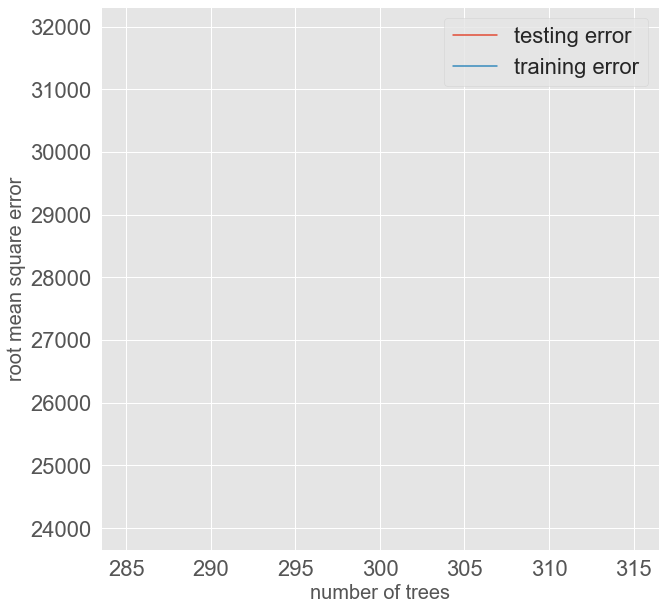

In [511]:

figsize(10,10)
plt.style.use("ggplot")
plt.plot(results["param_n_estimators"], -1*results["mean_test_score"], label="testing error")
plt.plot(results["param_n_estimators"], -1*results["mean_train_score"], label="training error")
plt.legend()
plt.ylabel("root mean square error", size=20)
plt.xlabel("number of trees", size= 20)
plt.show()

From this plot, it's pretty clear the training error is similar to  the testing error, which shows that the model is good. 

Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly.

# Evaluate the Final Model of the Test Set

We will use the best model from hyperparameter tuning to make predictions on the testing set. 

Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world.

In [482]:
default_model = GradientBoostingRegressor(random_state=42)
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=2, max_features='sqrt',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=300, random_state=42)

In [483]:
%%timeit -n 1 -r 5
default_model.fit(X,y)

197 ms ± 3.92 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [484]:
%%timeit -n 1 -r 5
final_model.fit(X,y)

262 ms ± 5.62 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [485]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

In [486]:
print("the default model performance on the test set: rsme = %0.4f"  %rmse(y_test,default_pred))
print("the final model performance on the test set: rsme = %0.4f" %rmse(y_test,final_pred))

the default model performance on the test set: rsme = 34723.3953
the final model performance on the test set: rsme = 34577.6418


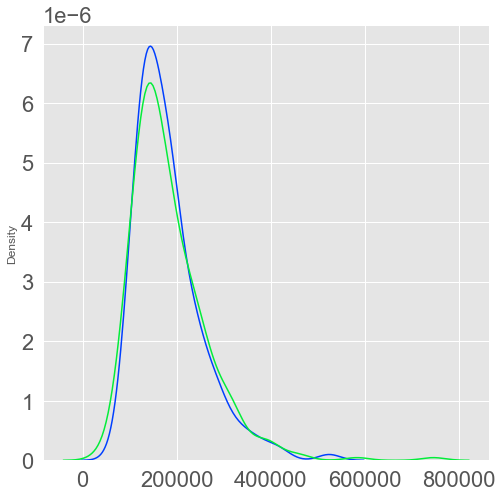

In [509]:
figsize(8,8)
sns.kdeplot(final_pred, label="predictions")
sns.kdeplot(y_test, label="test values")
plt.show()

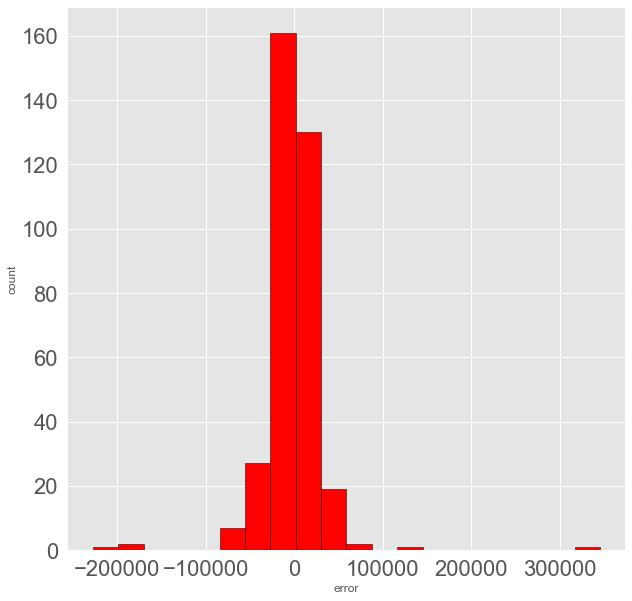

In [512]:
figsize =(6,6)
residuals = final_pred - y_test

plt.hist(residuals, color = "red", bins=20, edgecolor="black")
plt.ylabel("count")
plt.xlabel("error")
plt.show()

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the SalePrice. 
We also saw that hyperparamter tuning was able to improve the performance of the model although at a considerable cost in terms of time invested. This is a good reminder that proper feature engineering and gathering more data has a much larger pay-off than fine-tuning the model. 
We also observed the trade-off in run-time versus accuracy, which is one of many considerations we have to take into account when designing machine learning models.

In [513]:
test_predictions = final_model.predict(test_new)

In [514]:
test_ids = test["Id"]
submission= {"Id": test_ids, "SalePrice":test_predictions}
submission = pd.DataFrame(submission)
submission.to_csv("submission_housing.csv", index=False)

In [515]:
submission.head()

Id      SalePrice
0   337  364538.875329
1  1018  198638.248748
2   929  252849.865359
3  1148  164322.575346
4  1227  232144.958137

In [516]:
submission.shape[0]

292

In [537]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_test,final_pred)
score

0.02378911039914229

1. Hence we have completed our Project of building a model based on a Training data set and now we have sucessfully tested it on the Test data given. where we have got about 0.02378 or 2.4% error.

2. We see that the model is not only accurate but also quite efficient when it comes to time consumption.



In [ ]:
# Simplify our correlation heatmap to show only the target variable
fig, ax = plt.subplots(figsize=(7, 20))
sns.heatmap(df.corr().iloc[-1,:].values.reshape(-1, 1).round(2), annot=True, cmap='RdBu')
plt.title("Feature Correlation", fontsize=15)
ax.set_yticklabels(df.columns.tolist(), rotation=0)
ax.set_xticklabels(['price_range'])